# CAPTSTONE PROJECT 3:

### DATA CLEANING

***

#### CLEAN DATA:
* Import data from NASDAQ API.
* Transform and make useable data.
* Address any NaN or NaT values appropriately

In [1]:
# Import necessary modules for DataFrame cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import finnhub
import nasdaqdatalink
# from polygon import RESTClient
from dotenv import load_dotenv
# import requests as r
# import json
# import collections as coll
### FOR PCA ANALYSIS ###
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

##### PULL DATA FROM API's and Import public table from S & P 500
***

In [2]:
load_dotenv(".env")
NASDAQ_DATA_LINK_API_KEY = os.getenv('NASDAQ_DATA_LINK_API_KEY')
MKTS_API_KEY = os.getenv('MARKETSTACK_API_KEY')
FNH_API_KEY = os.getenv('FINNHUB_API_KEY')
PLY_API_KEY = os.getenv('POLYGON_API_KEY')

# print(f"NASDAQ KEY: {NASDAQ_DATA_LINK_API_KEY}")
# print(f"MARKETSTACK KEY: {MKTS_API_KEY}")
# print(f"FINNHUB KEY: {FNH_API_KEY}")
# print(f"POLYGON KEY: {PLY_API_KEY}")

In [3]:
# Pull data from Nasdaq for BitCoin
table_code = 'QDL/BCHAIN'
nasdaqdatalink.read_key('.env')
ndq_api_bitcoin_df = nasdaqdatalink.get_table(table_code, paginate=True)

In [4]:
ndq_api_bitcoin_df = ndq_api_bitcoin_df.reset_index().drop(columns='None').rename(columns={'code': 'Unique Metrics Identifier', 'date': 'Date of Record', 'value': 'Numerical Bitcoin Metric Value'})

In [5]:
ndq_api_bitcoin_df.head()

Unique Metrics Identifier Date of Record  Numerical Bitcoin Metric Value
0                     TVTVR     2016-07-17                         60.5821
1                     TVTVR     2016-07-16                         93.1541
2                     TVTVR     2016-07-15                         76.3548
3                     TVTVR     2016-07-14                         86.4739
4                     TVTVR     2016-07-13                         39.4733

In [6]:
ndq_api_bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160937 entries, 0 to 160936
Data columns (total 3 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Metrics Identifier       160937 non-null  object        
 1   Date of Record                  160937 non-null  datetime64[ns]
 2   Numerical Bitcoin Metric Value  160937 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ MB


Good news, no missing values.  However the amount of data is very unmanageable and due to the abstraction of the _'Unique Metrics Identifier'_ into a single column. it causes us to have all to have all of the numerical values in a single column which is not good for our analysis purposes. We have our data, but in it's current format it's quite useless.  We will need to transform the table such that it is organized by ascending dates, with the _'Unique Metrics Identifier'_ codes converted to their respective meeanins and having a column for each with their numerical value matching underneath with their corresponding date.

In [7]:
cols_list = list(ndq_api_bitcoin_df['Unique Metrics Identifier'].unique())

In [8]:
cols_list_conv = ['Trade Volume vs Transaction Volume Ratio', 'USD Exchange Trade Volume',
                  'Total Transaction Fees USD', 'Total Transaction Fees', 'Total Output Volume',
                  'Total Bitcoins', 'Transaction Excluding Popular Addresses', 'Number of Transactions per Block',
                  'Total Number of Transactions', 'Number of Transactions', 'Network Deficit', 'Nummber of Unique Addresses Used',
                  'My Wallet Transaction Volume', 'My Wallet Number of Users', 'Number of Transactions per Day',
                  'Market Capitalization', 'Market Price', 'Miners Revenue', 'Miners Optimine?', 'Hash Rate',
                  'Estimated Transaction Volume USD', 'Estimated Transaction Volume', 'Difficulty', 'Cost Percent of Transaction Volume',
                  'Cost per Transaction', 'API Blockchain Size', 'Days Destroyed (Min Age 1 Year)', 'Days Destroyed (Min Age 1 Week)',
                  'Days Destroyed (Min Age 1 Month)', 'Days Destroyed', 'Days Destroyed Cumulutive', 'Average Block Size', 
                  'Median Transaction Confirmation Time']

In [9]:
cols_dict = {cols_list[i]: cols_list_conv[i] for i in range(len(cols_list))}


In [10]:
len(ndq_api_bitcoin_df['Date of Record'].unique())

5583

In [11]:
bitcoin_df = pd.DataFrame(ndq_api_bitcoin_df['Date of Record'].unique())

In [12]:
bitcoin_df = bitcoin_df.rename(columns={0:"date"}).set_index('date')

In [13]:
for col in cols_list:
    bitcoin_df = pd.merge(bitcoin_df, ndq_api_bitcoin_df[ndq_api_bitcoin_df['Unique Metrics Identifier'] == col].rename(columns={'Date of Record': 'date'}).set_index('date'),
                                 on='date', how='left')
    if 'Unique Metrics Identifier_x' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value_x': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier_x', inplace=True)
    elif 'Unique Metrics Identifier_y' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value_y': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier_y', inplace=True)
    elif 'Unique Metrics Identifier' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier', inplace=True)

In [14]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5583 entries, 2016-07-17 to 2024-02-17
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Trade Volume vs Transaction Volume Ratio  2753 non-null   float64
 1   USD Exchange Trade Volume                 5582 non-null   float64
 2   Total Transaction Fees USD                5578 non-null   float64
 3   Total Transaction Fees                    5580 non-null   float64
 4   Total Output Volume                       5580 non-null   float64
 5   Total Bitcoins                            5580 non-null   float64
 6   Transaction Excluding Popular Addresses   5580 non-null   float64
 7   Number of Transactions per Block          5580 non-null   float64
 8   Total Number of Transactions              5580 non-null   float64
 9   Number of Transactions                    5580 non-null   float64
 10  Network Deficit   

In [15]:
bitcoin_df.head()

Trade Volume vs Transaction Volume Ratio  \
date                                                   
2016-07-17                                   60.5821   
2016-07-16                                   93.1541   
2016-07-15                                   76.3548   
2016-07-14                                   86.4739   
2016-07-13                                   39.4733   

            USD Exchange Trade Volume  Total Transaction Fees USD  \
date                                                                
2016-07-17               2.634661e+07                  32557.4100   
2016-07-16               2.142396e+06                  33605.5500   
2016-07-15               2.692855e+07                  36791.9734   
2016-07-14               3.431802e+07                  38613.9900   
2016-07-13               2.846618e+06                  35233.5000   

            Total Transaction Fees  Total Output Volume  Total Bitcoins  \
date                                                                      
2016-07-17                 47.8700         2.055307e+06      15765000.0   
2016-07-16                 50.6700         1.965918e+06      15761512.5   
2016-07-15                 55.2255         3.349411e+06      15761175.0   
2016-07-14                 58.3800         2.136184e+06      15759487.5   
2016-07-13                 53.5500         2.253580e+06      15757725.0   

            Transaction Excluding Popular Addresses  \
date                                                  
2016-07-17                                 222808.0   
2016-07-16                                 178573.0   
2016-07-15                                 178573.0   
2016-07-14                                 212927.0   
2016-07-13                                 214101.0   

            Number of Transactions per Block  Total Number of Transactions  \
date                                                                         
2016-07-17                           1147.73                   143032695.0   
2016-07-16                           1160.45                   142861682.0   
2016-07-15                           1600.60                   142483779.0   
2016-07-14                           1553.90                   142463409.0   
2016-07-13                           1677.63                   142242754.0   

            Number of Transactions  ...  Cost Percent of Transaction Volume  \
date                                ...                                       
2016-07-17                171013.0  ...                              0.8116   
2016-07-16                182192.0  ...                              1.0200   
2016-07-15                216081.0  ...                              0.6200   
2016-07-14                220655.0  ...                              0.7368   
2016-07-13                218093.0  ...                              0.5800   

            Cost per Transaction  API Blockchain Size  \
date                                                    
2016-07-17                7.5900           75808.0400   
2016-07-16                7.3200           75702.3500   
2016-07-15                5.4132           76485.5604   
2016-07-14                5.4900           75487.5800   
2016-07-13                5.0600           75374.0000   

            Days Destroyed (Min Age 1 Year)  Days Destroyed (Min Age 1 Week)  \
date                                                                           
2016-07-17                              0.0                              0.0   
2016-07-16                              0.0                              0.0   
2016-07-15                              0.0                              0.0   
2016-07-14                              0.0                              0.0   
2016-07-13                              0.0                              0.0   

            Days Destroyed (Min Age 1 Month)  Days Destroyed  \
date                                                           
2016-07-17                       

In [16]:
bitcoin_df = bitcoin_df.reset_index().sort_values(by='date')

### EXPLORATORY DATA ANALYSIS: ###
***

We still have outstanding NaN values after successfuly transforming the Dataframe and organizing data points by ascending date.  This has left a substantial degree of missing values and as there are not an equal amount of data points per date in each column.  Thus before deciding what to do with each of these NaN values a moderate degree of Exploratory Data Analysis will be done in order to decide what to do with these values as well as consider what features might be engineered for our modeling and analysis further on in the project.

In [17]:
corr = bitcoin_df.corr(numeric_only=True)

In [18]:
bitcoin_df

date  Trade Volume vs Transaction Volume Ratio  \
5581 2009-01-02                                       NaN   
2752 2009-01-03                                       0.0   
2751 2009-01-04                                       0.0   
2750 2009-01-05                                       0.0   
2749 2009-01-06                                       0.0   
...         ...                                       ...   
2757 2024-04-11                                       NaN   
2756 2024-04-12                                       NaN   
2755 2024-04-13                                       NaN   
2754 2024-04-14                                       NaN   
2753 2024-04-15                                       NaN   

      USD Exchange Trade Volume  Total Transaction Fees USD  \
5581               0.000000e+00                0.000000e+00   
2752               0.000000e+00                0.000000e+00   
2751               0.000000e+00                0.000000e+00   
2750               0.000000e+00                0.000000e+00   
2749               0.000000e+00                0.000000e+00   
...                         ...                         ...   
2757               4.392559e+08                7.355170e+06   
2756               3.304597e+08                1.099093e+07   
2755               6.560609e+08                7.120982e+06   
2754               6.250465e+08                4.890807e+06   
2753               3.584423e+08                         NaN   

      Total Transaction Fees  Total Output Volume  Total Bitcoins  \
5581                  0.0000              50.0000           50.00   
2752                  0.0000               0.0000           50.00   
2751                  0.0000               0.0000           50.00   
2750                  0.0000               0.0000           50.00   
2749                  0.0000               0.0000           50.00   
...                      ...                  ...             ...   
2757                104.3793          814237.4968     19679881.25   
2756                157.2191          798696.5183     19680756.25   
2755                105.4958          639675.4301     19681743.75   
2754                 76.1596          671643.7468     19682868.75   
2753                     NaN                  NaN             NaN   

      Transaction Excluding Popular Addresses  \
5581                                      1.0   
2752                                      0.0   
2751                                      0.0   
2750                                      0.0   
2749                                      0.0   
...                                       ...   
2757                                 475962.0   
2756                                 448225.0   
2755                                 506936.0   
2754                                 473079.0   
2753                                      NaN   

      Number of Transactions per Block  Total Number of Transactions  ...  \
5581                            1.0000                           1.0  ...   
2752                            1.0000                           1.0  ...   
2751                            1.0000                           1.0  ...   
2750                            1.0000                           1.0  ...   
2749                            1.0000                           1.0  ...   
...                                ...                           ...  ...   
2757                         3607.8864                   986969366.0  ...   
2756                         3297.7132                   987447395.0  ...   
2755                         3092.5183                   987894854.0  ...   
2754                         3014.8280                   988401169.0  ...   
2753                               NaN                           NaN  ...   

      Cost Percent of Transaction Volume  Cost per Transaction  \
5581                              0.0000                0.0000   
2752                              0.0000      

<Axes: >

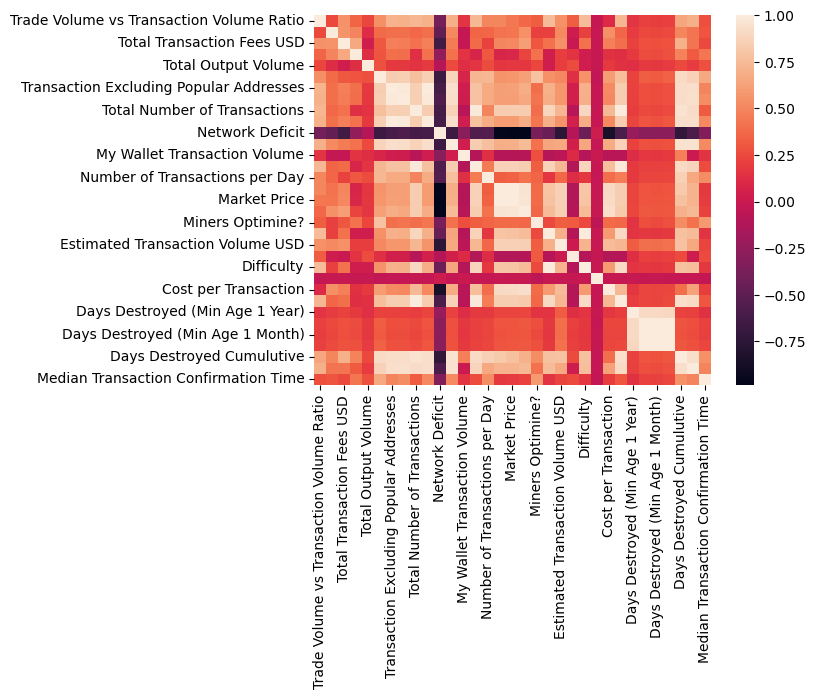

In [19]:
sns.heatmap(corr)

In [20]:
cols_dict

{'TVTVR': 'Trade Volume vs Transaction Volume Ratio',
 'TRVOU': 'USD Exchange Trade Volume',
 'TRFUS': 'Total Transaction Fees USD',
 'TRFEE': 'Total Transaction Fees',
 'TOUTV': 'Total Output Volume',
 'TOTBC': 'Total Bitcoins',
 'NTREP': 'Transaction Excluding Popular Addresses',
 'NTRBL': 'Number of Transactions per Block',
 'NTRAT': 'Total Number of Transactions',
 'NTRAN': 'Number of Transactions',
 'NETDF': 'Network Deficit',
 'NADDU': 'Nummber of Unique Addresses Used',
 'MWTRV': 'My Wallet Transaction Volume',
 'MWNUS': 'My Wallet Number of Users',
 'MWNTD': 'Number of Transactions per Day',
 'MKTCP': 'Market Capitalization',
 'MKPRU': 'Market Price',
 'MIREV': 'Miners Revenue',
 'MIOPM': 'Miners Optimine?',
 'HRATE': 'Hash Rate',
 'ETRVU': 'Estimated Transaction Volume USD',
 'ETRAV': 'Estimated Transaction Volume',
 'DIFF': 'Difficulty',
 'CPTRV': 'Cost Percent of Transaction Volume',
 'CPTRA': 'Cost per Transaction',
 'BLCHS': 'API Blockchain Size',
 'BCDDY': 'Days Destroyed

C:\Users\micha\AppData\Local\Temp\ipykernel_25992\1179850967.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


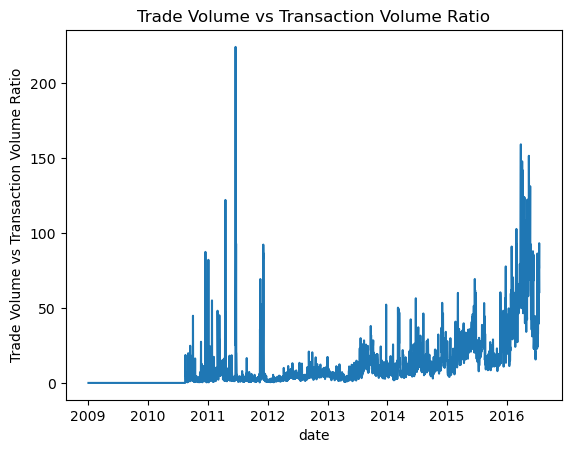

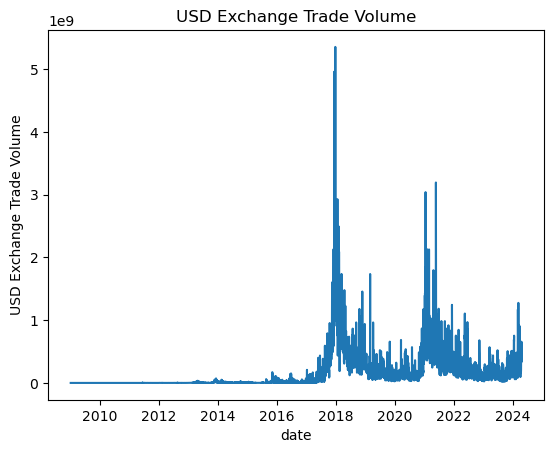

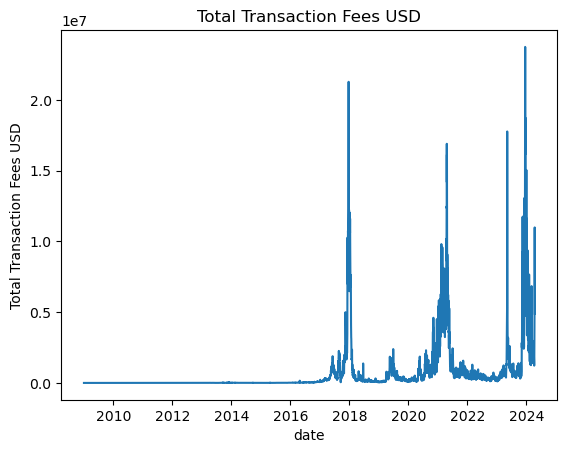

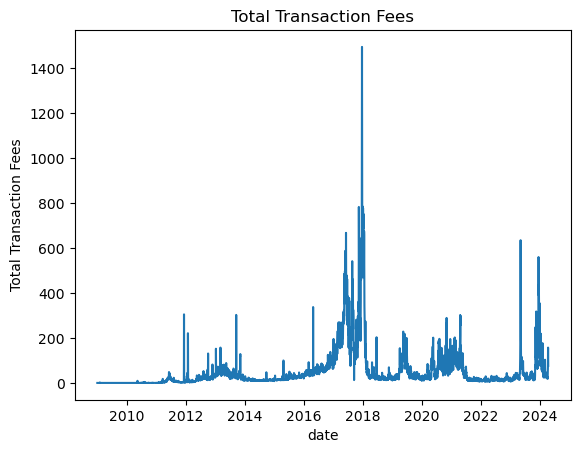

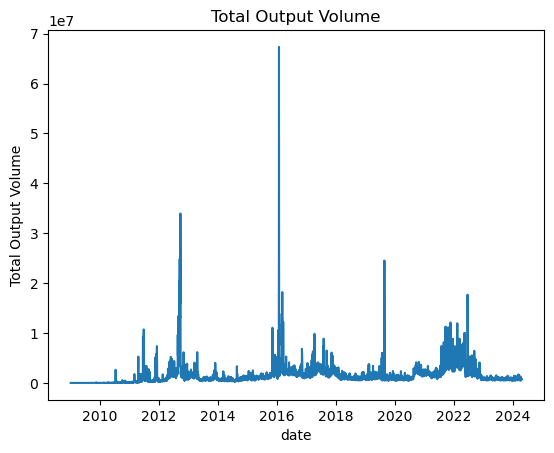

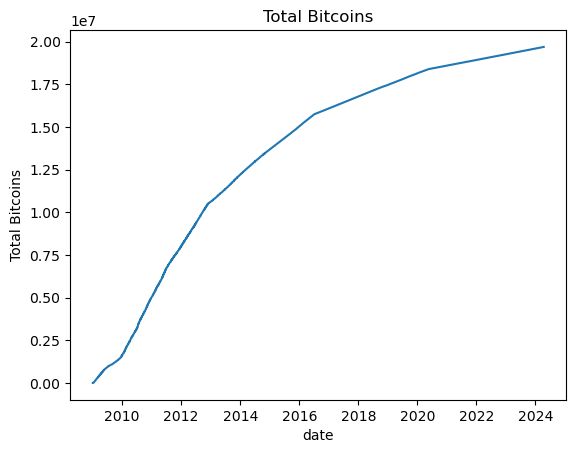

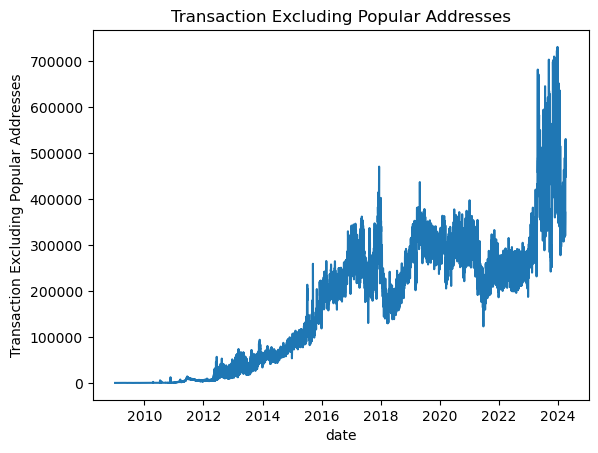

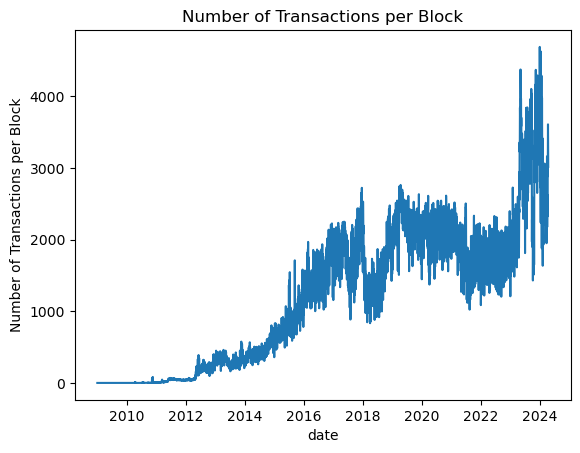

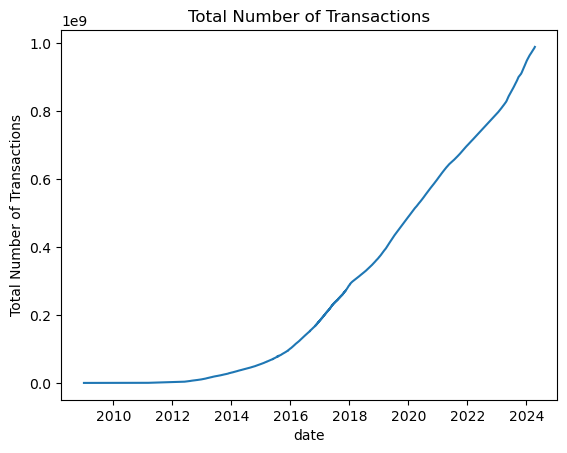

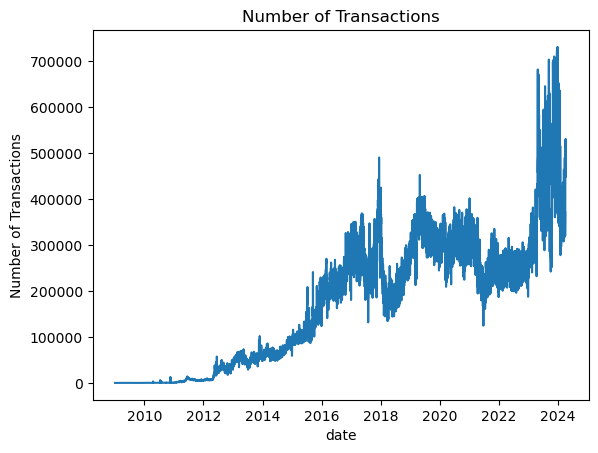

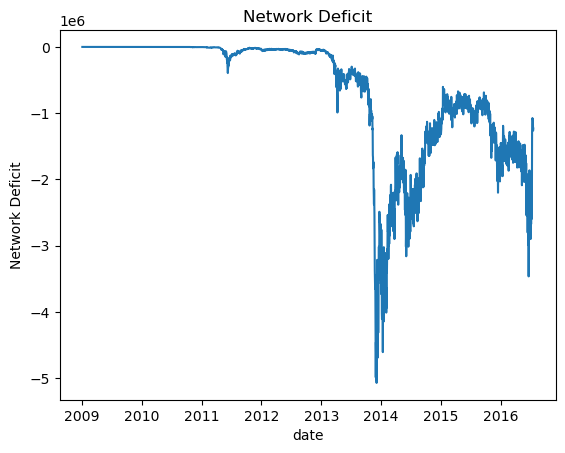

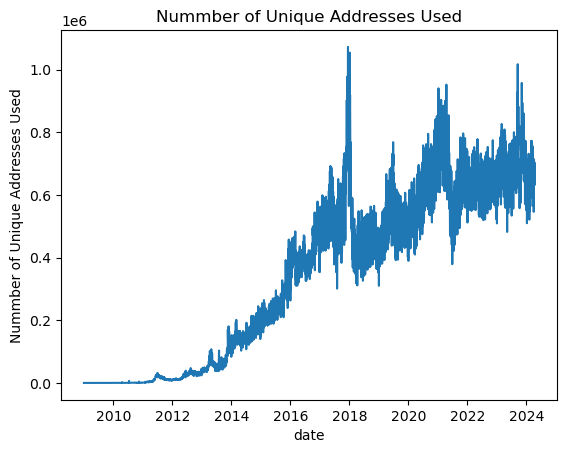

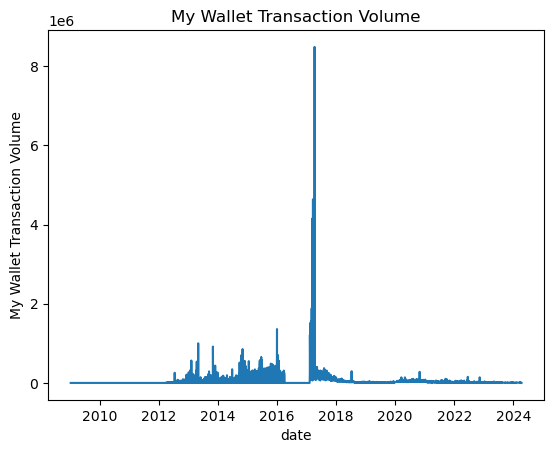

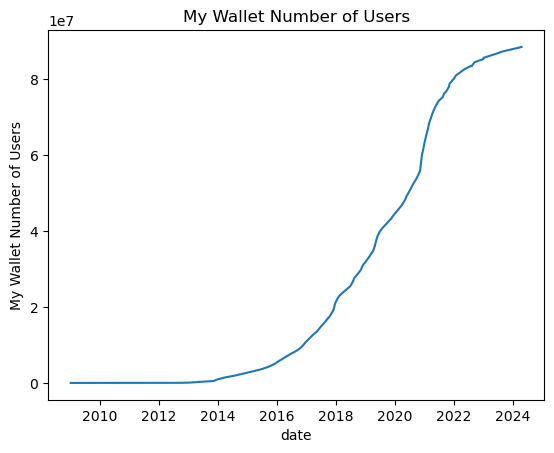

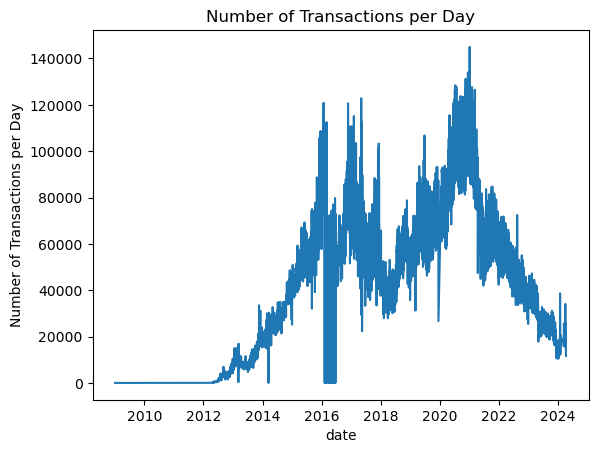

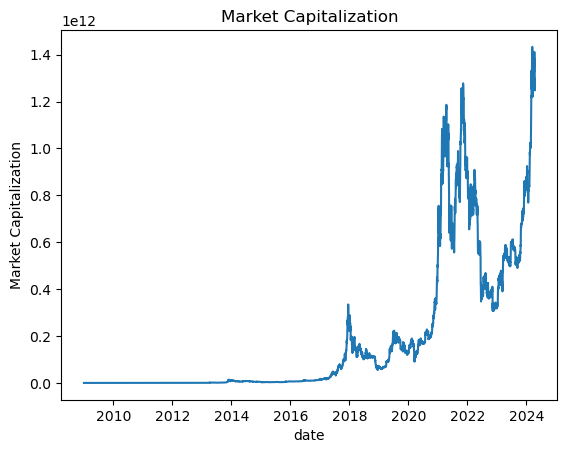

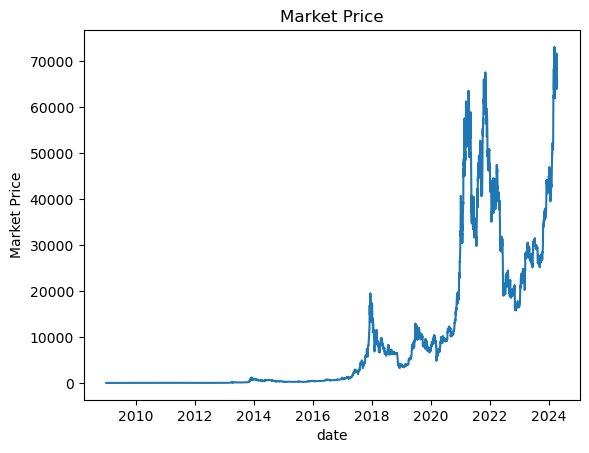

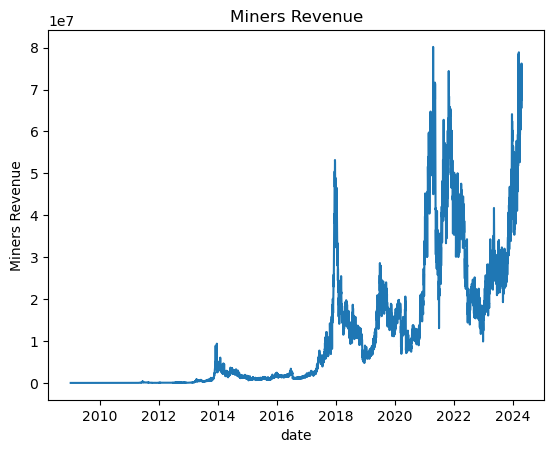

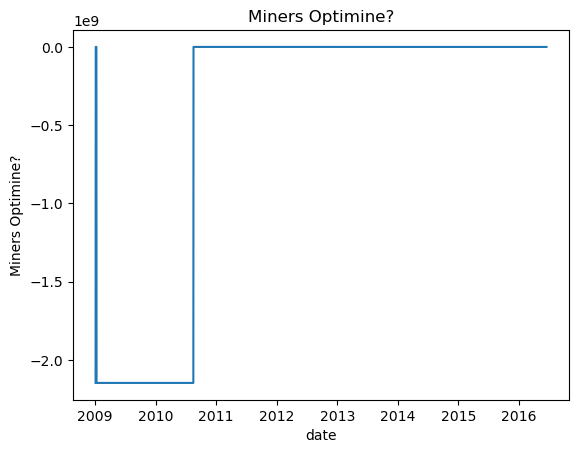

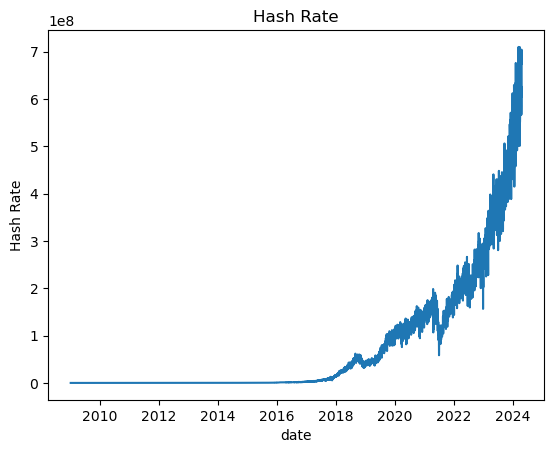

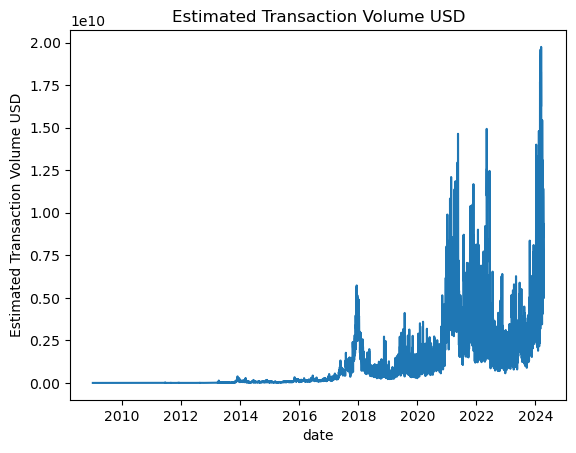

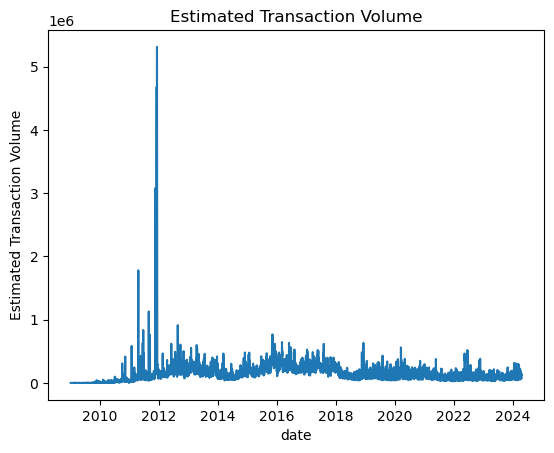

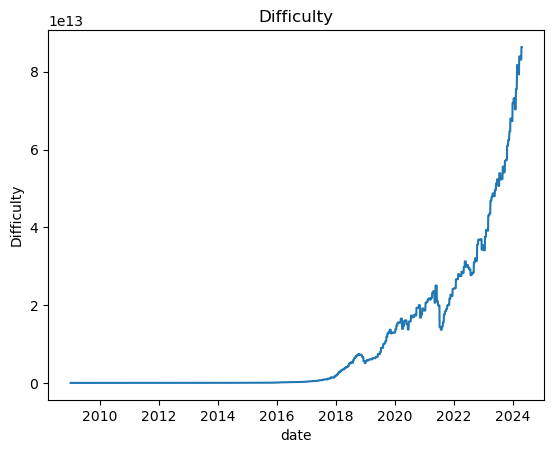

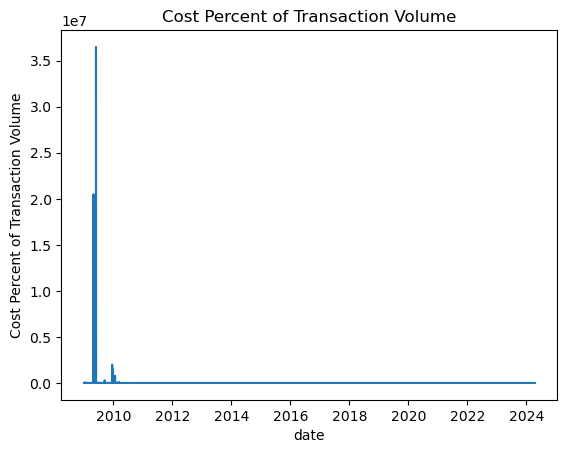

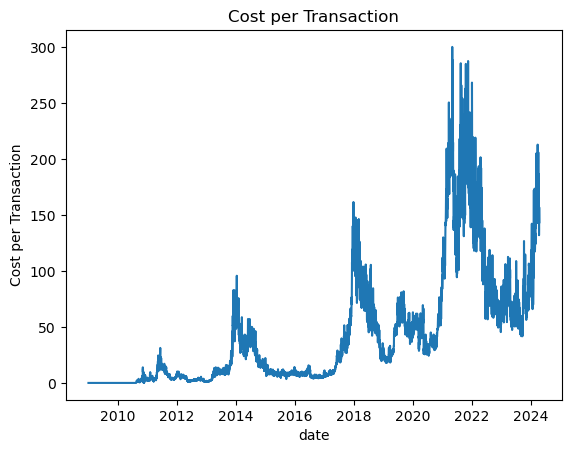

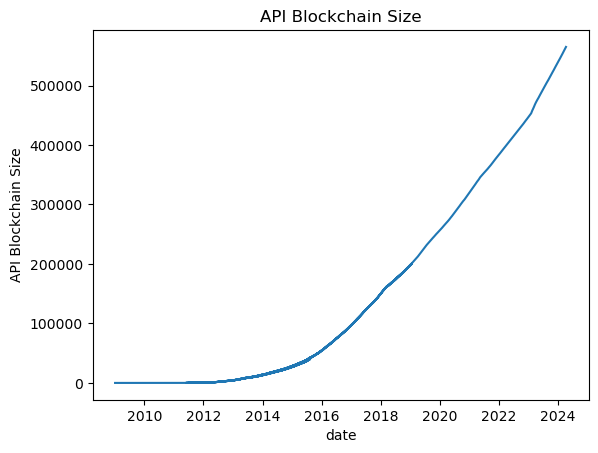

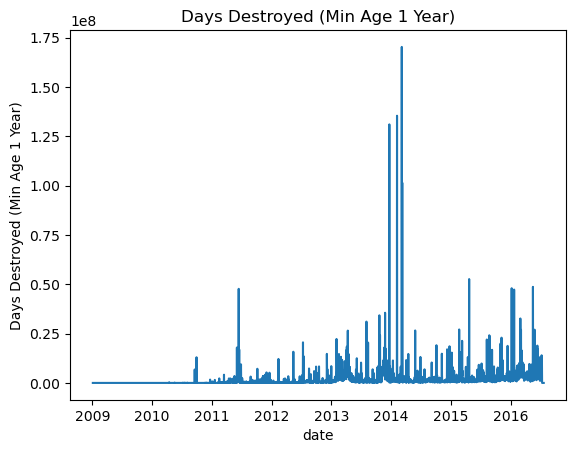

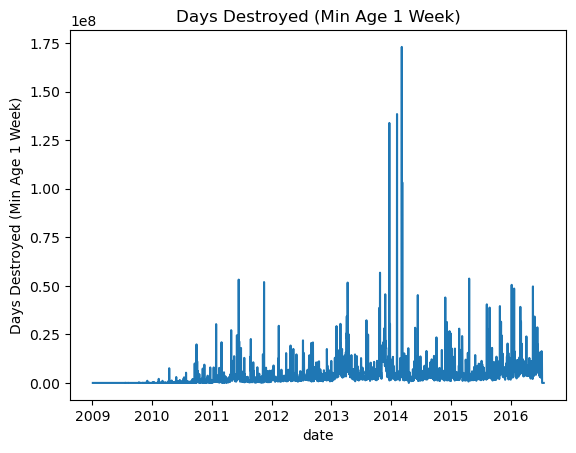

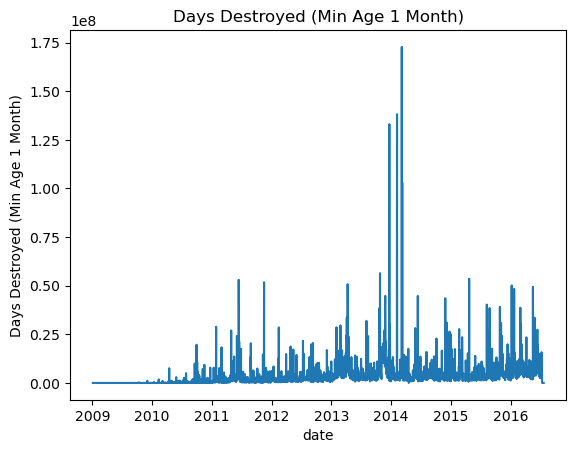

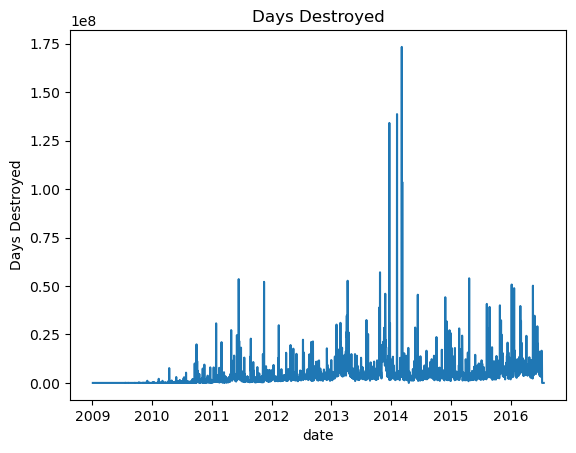

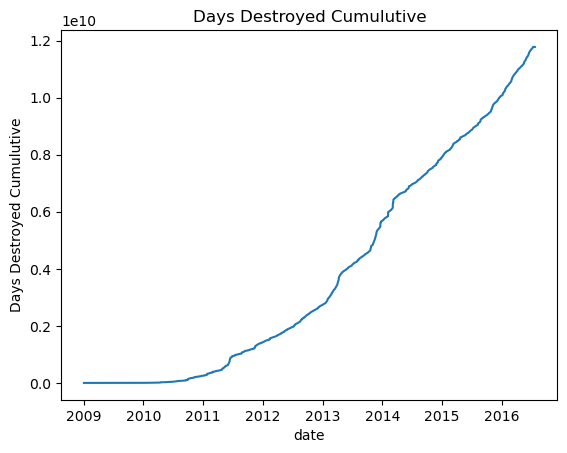

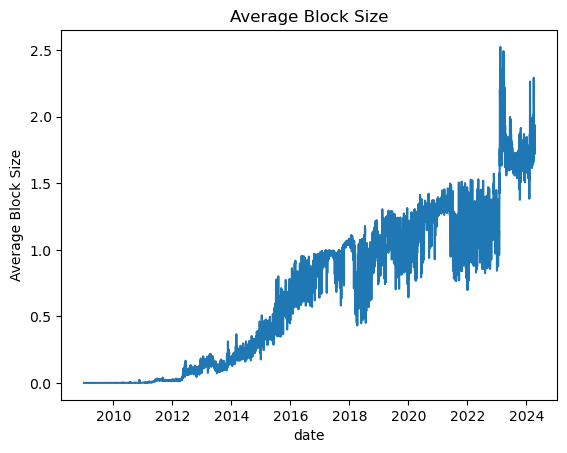

In [21]:
for col in bitcoin_df.drop(columns='date').columns:
    lineplot = bitcoin_df[['date', col]]
    fig, ax = plt.subplots()
    sns.lineplot(lineplot, ax=ax, x='date', y=col)
    plt.title(col)
    plt.plot()
    
plt.close()    

Based on what is seen here there are periods where certain data wasn't reported, with that being said if we were to drop those columns in the middle it would interrupt the continuity of the other Data Columns.  Therefore we will needs must impute data on a case by case scenario per column on the DataFrame until it is complete and as accurate with bias as we can possible make it.

In [22]:
bitcoin_df.rename(columns={'Nummber of Unique Addresses Used': 'Number of Unique Addresses Used'}, inplace=True)

In [23]:
bitcoin_df.set_index('date', inplace=True)

In [24]:
bitcoin_df[bitcoin_df['Trade Volume vs Transaction Volume Ratio'].isnull() == True]['Trade Volume vs Transaction Volume Ratio']

date
2009-01-02   NaN
2016-07-18   NaN
2016-07-19   NaN
2016-07-20   NaN
2016-07-21   NaN
              ..
2024-04-11   NaN
2024-04-12   NaN
2024-04-13   NaN
2024-04-14   NaN
2024-04-15   NaN
Name: Trade Volume vs Transaction Volume Ratio, Length: 2830, dtype: float64

Trade Volume vs Transaction Volume ratio is just long winded for how many trades were made per transaction.  Therefore we should be able to dived _USD Exchange Trade Volume_ by _Extimated Transaction Volume_ to fill those NaN values in these columns.

In [25]:
bitcoin_df['Trade Volume vs Transaction Volume Ratio'].fillna(bitcoin_df['USD Exchange Trade Volume'] / bitcoin_df['Estimated Transaction Volume USD'], inplace=True)
bitcoin_df['Trade Volume vs Transaction Volume Ratio'].fillna(0.0, inplace=True)

[]

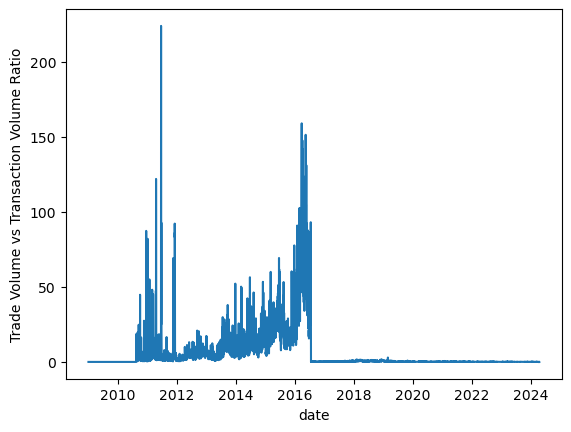

In [26]:
sns.lineplot(bitcoin_df['Trade Volume vs Transaction Volume Ratio'])
plt.plot()

Well assuming I selected the correct columns for performing the calculation, then that would indicate why Bitcoin stopped tracking this. There data values are so low they might as well be zero.  Though I was trying to save this one column it turns out that this along with the other columns which end shortly after the inception of 2016 will need to be dropped.

In [27]:
bitcoin_df.drop(columns=['Trade Volume vs Transaction Volume Ratio', 'Network Deficit', 'Miners Optimine?', 'Days Destroyed (Min Age 1 Year)',
                         'Days Destroyed (Min Age 1 Week)', 'Days Destroyed (Min Age 1 Month)', 'Days Destroyed', 'Days Destroyed Cumulutive'],
                         inplace=True)

In [28]:
null_cols = []

for col in bitcoin_df.columns:
    if np.any(bitcoin_df[col].isnull() == True):
        null_cols.append(col)

null_cols

['USD Exchange Trade Volume',
 'Total Transaction Fees USD',
 'Total Transaction Fees',
 'Total Output Volume',
 'Total Bitcoins',
 'Transaction Excluding Popular Addresses',
 'Number of Transactions per Block',
 'Total Number of Transactions',
 'Number of Transactions',
 'Number of Unique Addresses Used',
 'My Wallet Transaction Volume',
 'My Wallet Number of Users',
 'Number of Transactions per Day',
 'Market Capitalization',
 'Market Price',
 'Miners Revenue',
 'Hash Rate',
 'Estimated Transaction Volume USD',
 'Estimated Transaction Volume',
 'Difficulty',
 'Cost Percent of Transaction Volume',
 'Cost per Transaction',
 'API Blockchain Size',
 'Average Block Size',
 'Median Transaction Confirmation Time']

C:\Users\micha\AppData\Local\Temp\ipykernel_25992\664917627.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots()


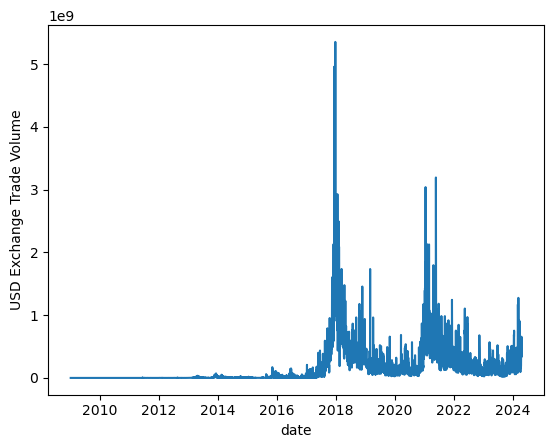

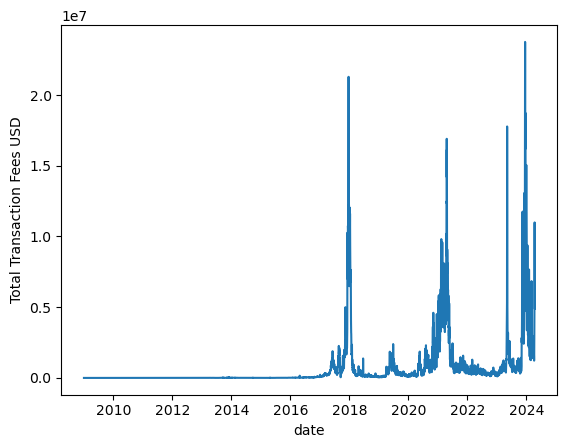

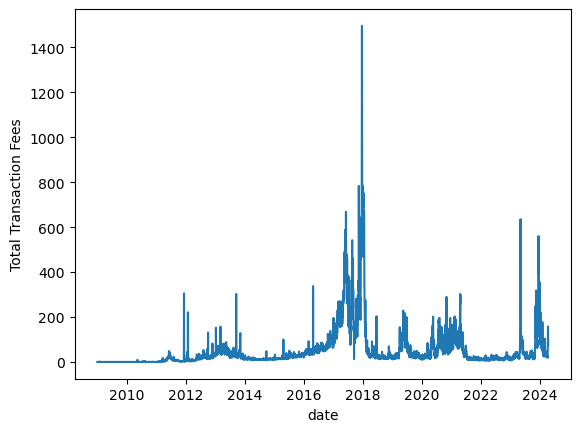

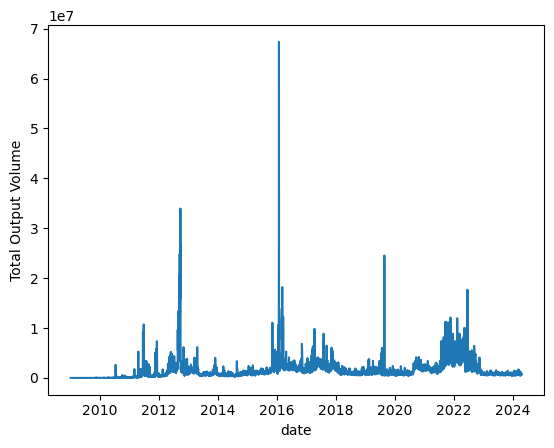

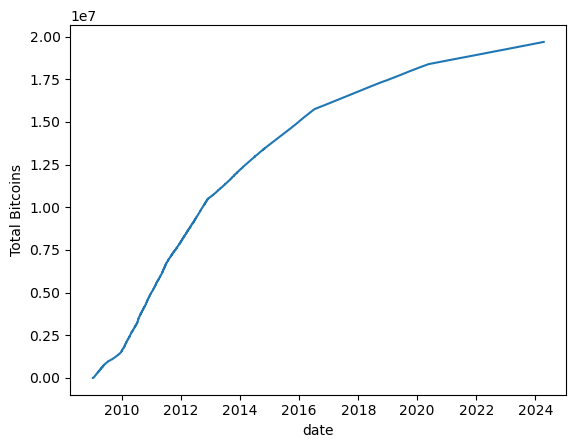

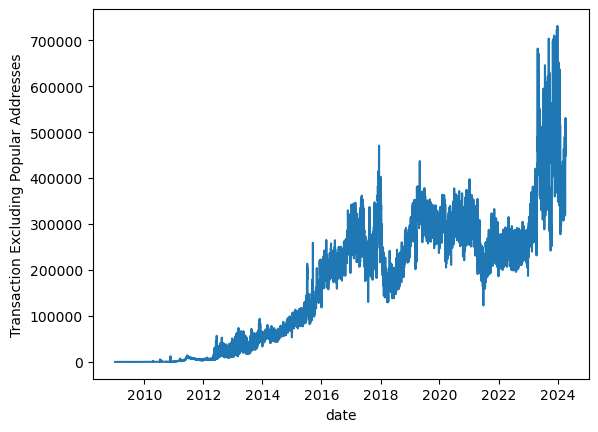

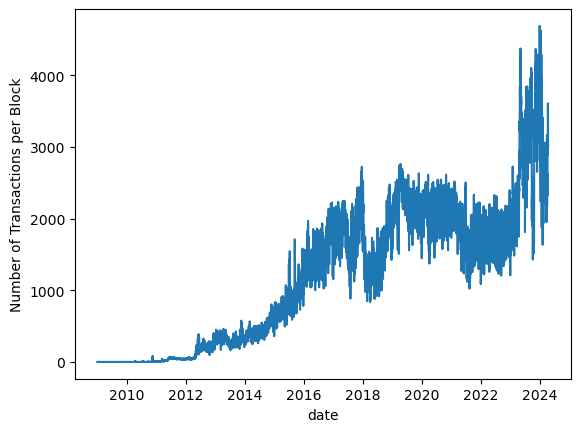

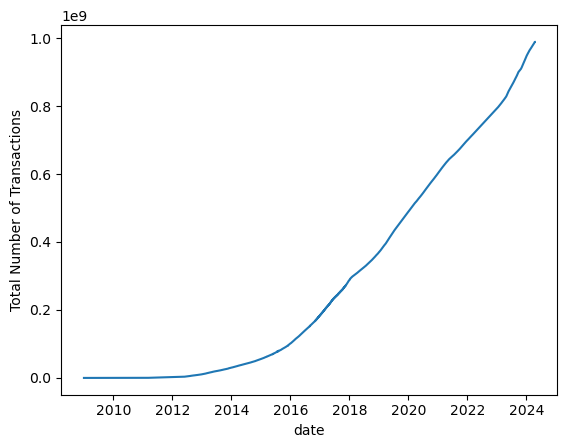

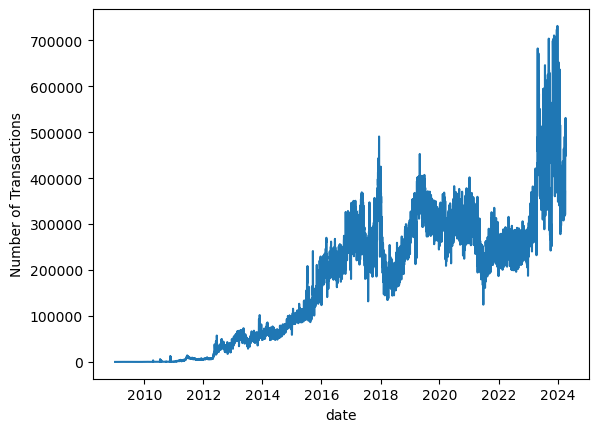

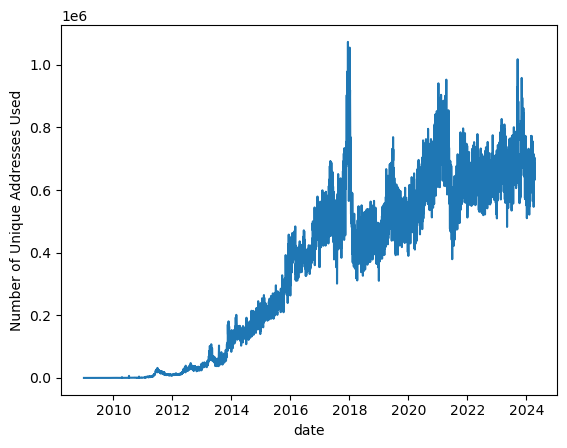

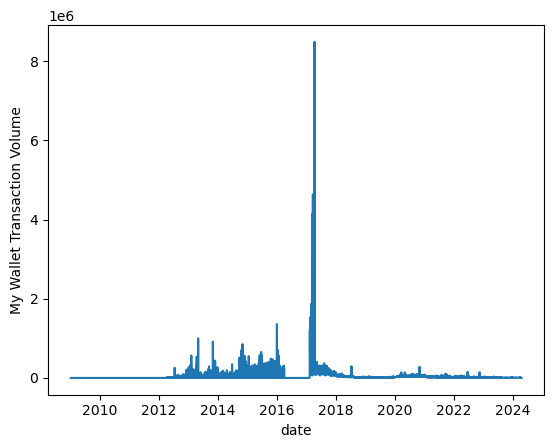

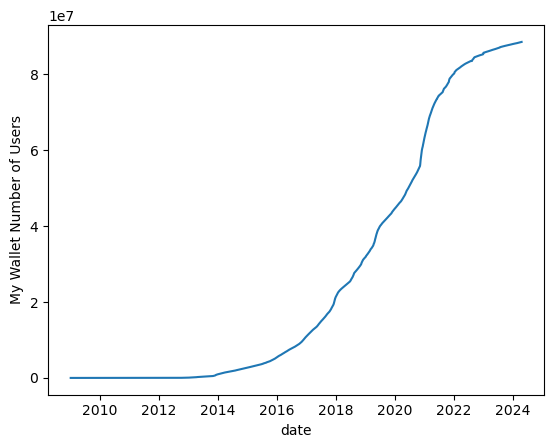

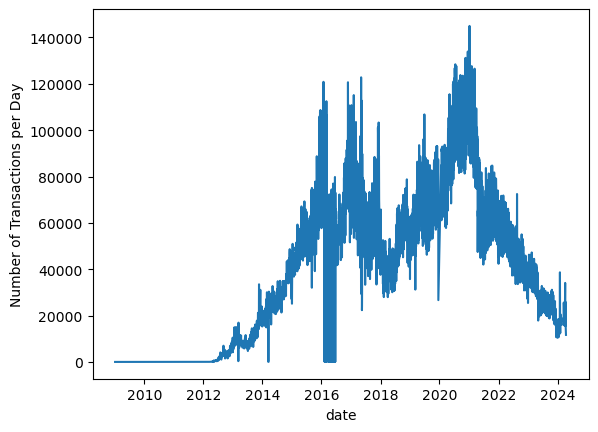

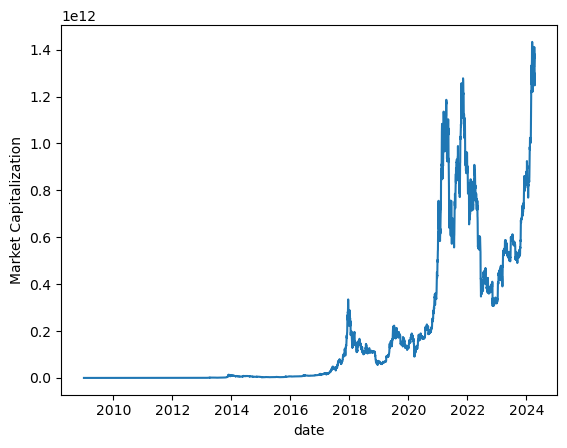

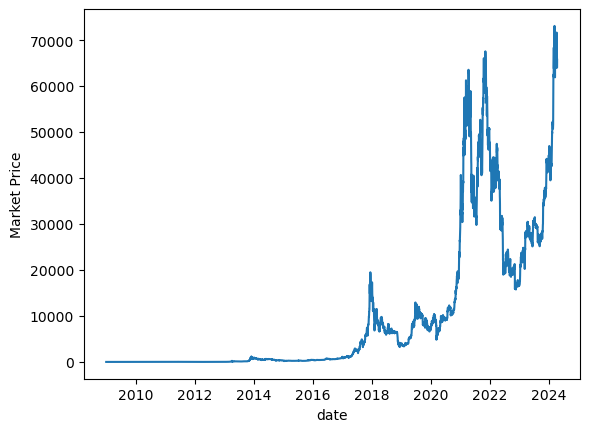

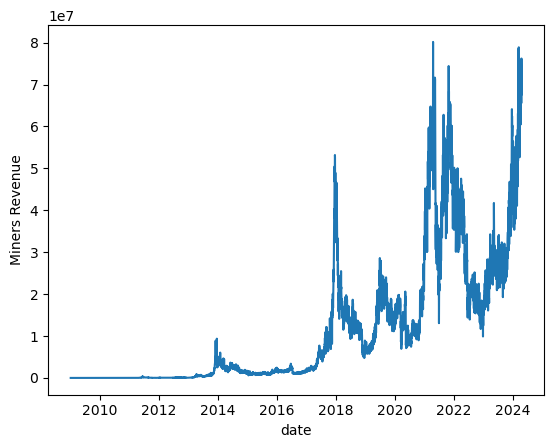

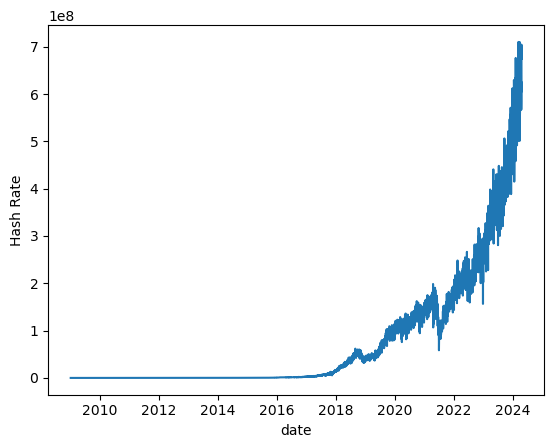

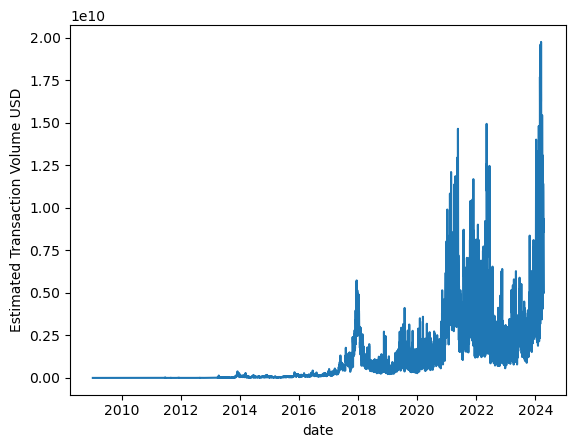

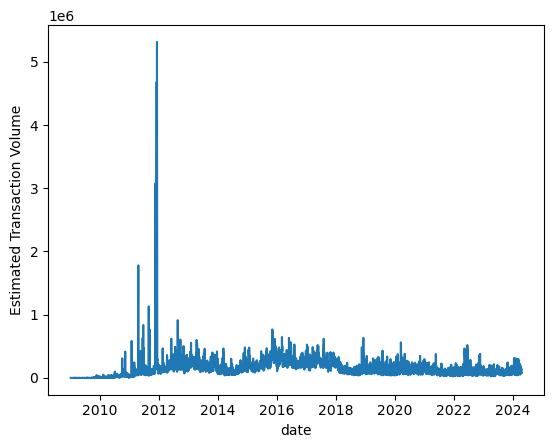

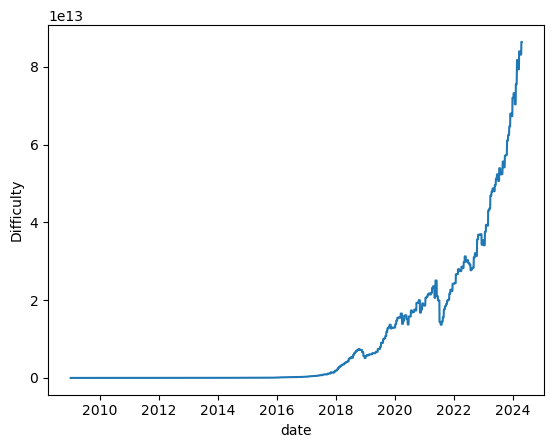

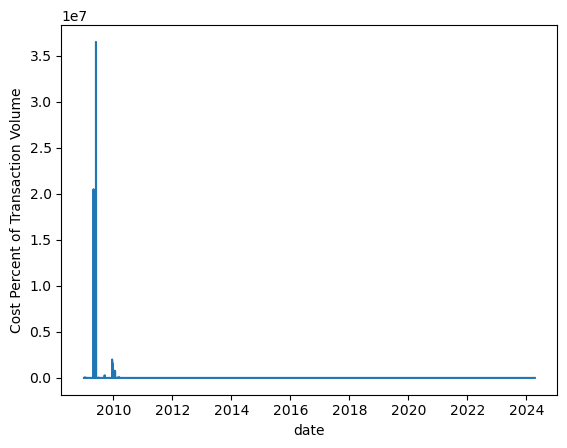

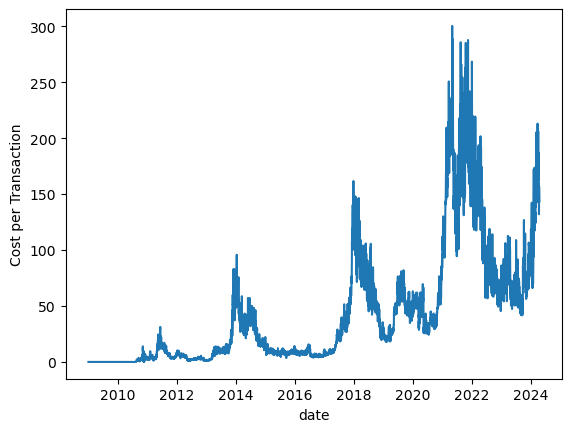

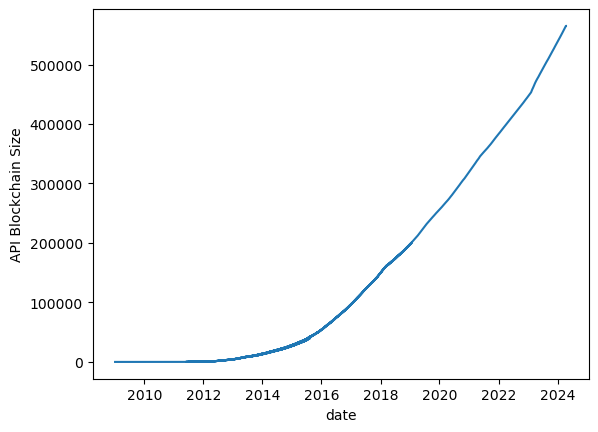

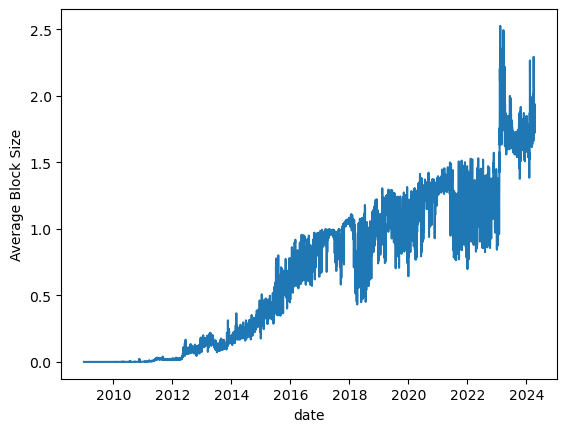

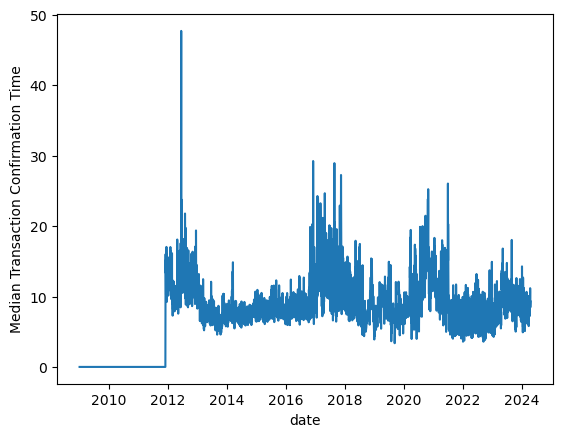

In [29]:
for col in null_cols:
    plt.subplots()
    sns.lineplot(bitcoin_df[col].interpolate(method='linear'))

Linear interpolation appears to work just fine for the remaining time series so we'll go with that.

In [30]:
bitcoin_df.interpolate(method='linear', inplace=True)

In [31]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5583 entries, 2009-01-02 to 2024-04-15
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   USD Exchange Trade Volume                5583 non-null   float64
 1   Total Transaction Fees USD               5583 non-null   float64
 2   Total Transaction Fees                   5583 non-null   float64
 3   Total Output Volume                      5583 non-null   float64
 4   Total Bitcoins                           5583 non-null   float64
 5   Transaction Excluding Popular Addresses  5583 non-null   float64
 6   Number of Transactions per Block         5583 non-null   float64
 7   Total Number of Transactions             5583 non-null   float64
 8   Number of Transactions                   5583 non-null   float64
 9   Number of Unique Addresses Used          5583 non-null   float64
 10  My Wallet Transaction Volume  

In [32]:
# Drop the last row for inconsistency in available data.
bitcoin_df[['Hash Rate', 'Median Transaction Confirmation Time']].isna()

Hash Rate  Median Transaction Confirmation Time
date                                                       
2009-01-02       True                                  True
2009-01-03      False                                 False
2009-01-04      False                                 False
2009-01-05      False                                 False
2009-01-06      False                                 False
...               ...                                   ...
2024-04-11      False                                 False
2024-04-12      False                                 False
2024-04-13      False                                 False
2024-04-14      False                                 False
2024-04-15      False                                 False

[5583 rows x 2 columns]

In [33]:
bitcoin_df.dropna(inplace=True)

In [34]:
plt.close()

With that out of the way it's time to do the more thorough EDA.  There are a number of questions that come up from just that sneak peak we gave ourselves earlier on:
- Why does the 'Median Transaction Confirmation Time', 'Cost per Transaction', 'Blockchain Size', etc all seem to zero out at the same time? was there a crash I was unaware of? and if so what caused it and does this invalidate the data prior to that time period?
- Almost in a bizarre form of correlation to this phenomenon, the data corresponding to destroyed bitcoins conforms completely to the time prior to the the bitcoin vanishing act around day 2000 of the data set.
- Also there is a number of data that show a clear logarithmic correlation to one another: 'API Blockchain Size', 'Difficulty', and 'Hash Rate'

I should like to explore these points of interest and see if I can't extract a bit of the noise prior to really preparing these data for ARIMA, and LSTM models, and perhaps as an experiment I might do a RandomForestRegressor as well.

To Start let's take a look at the data but only within the last year

C:\Users\micha\AppData\Local\Temp\ipykernel_25992\1217910043.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.subplots()


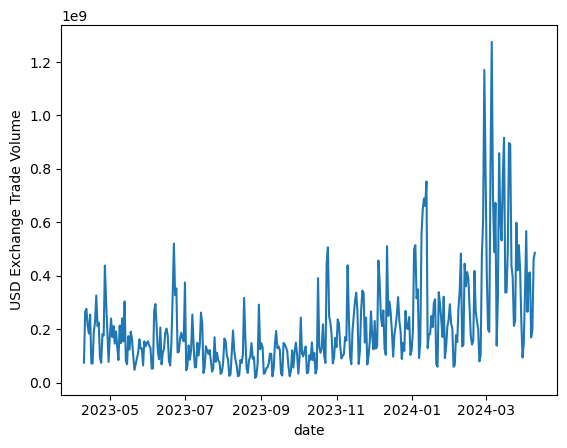

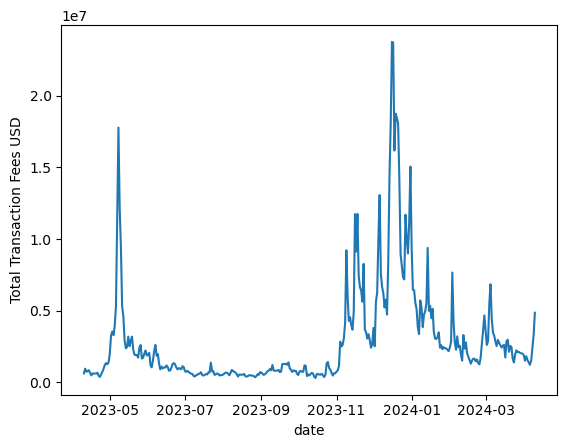

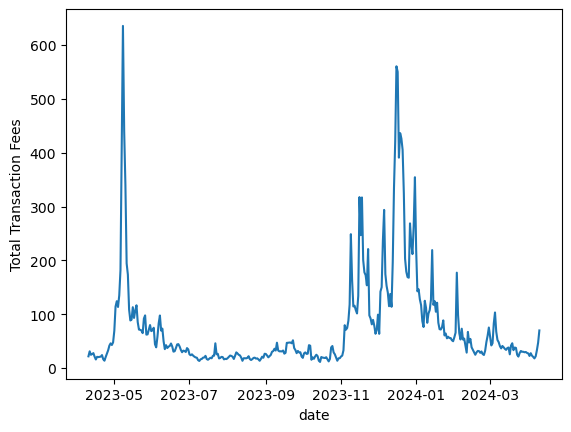

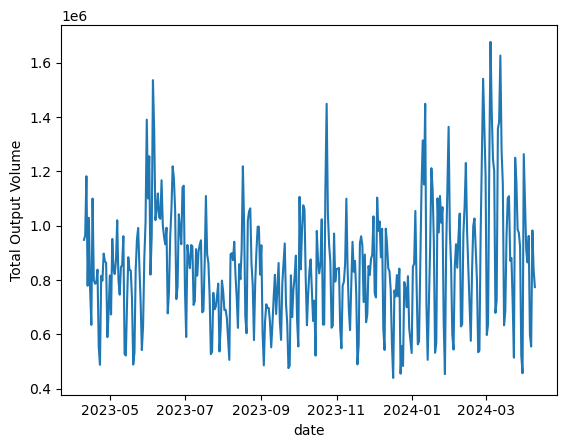

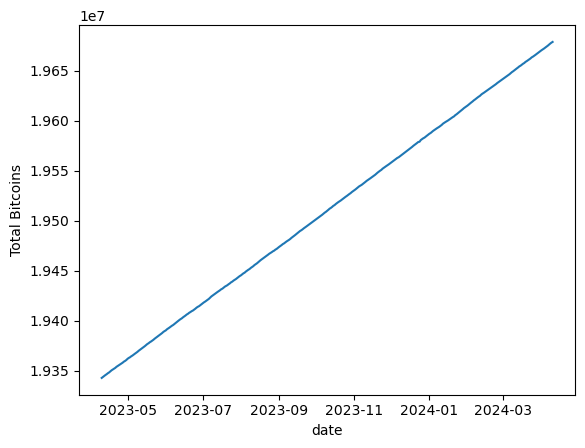

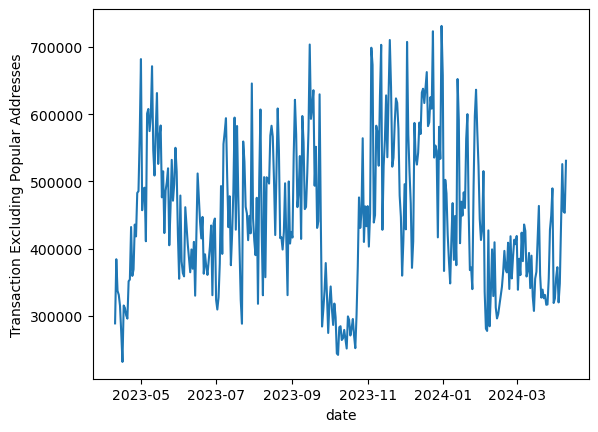

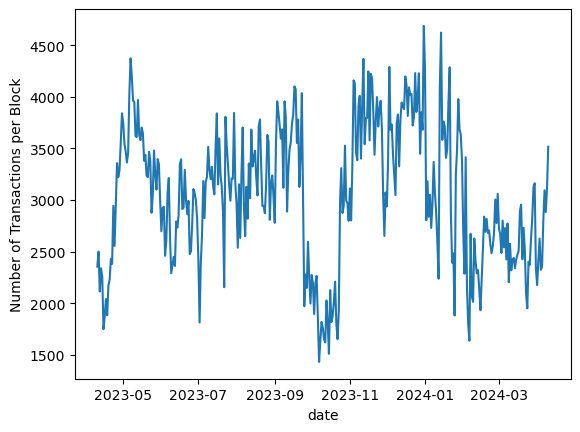

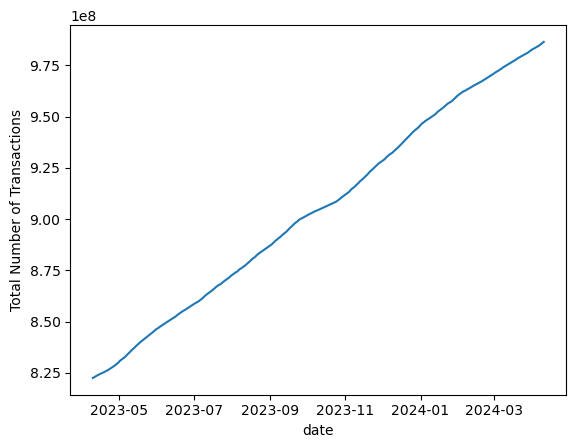

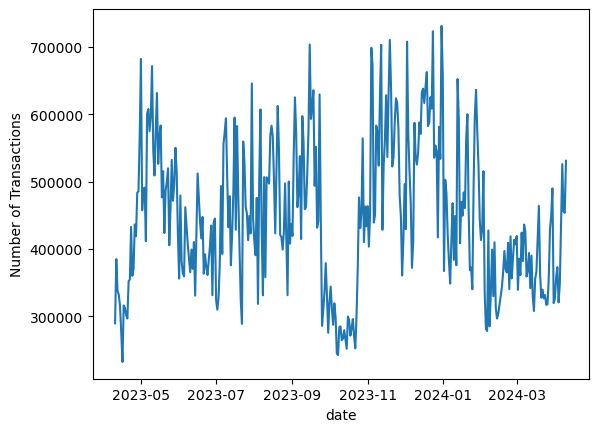

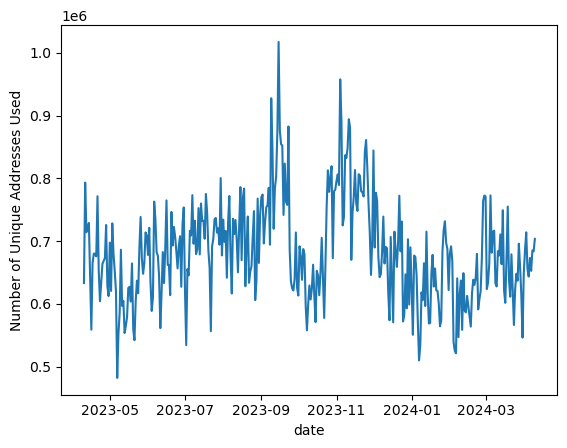

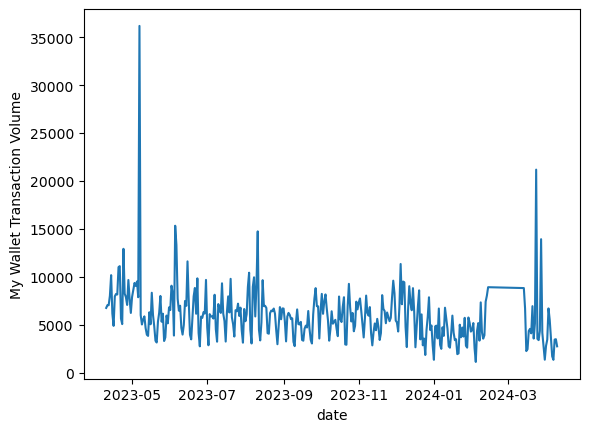

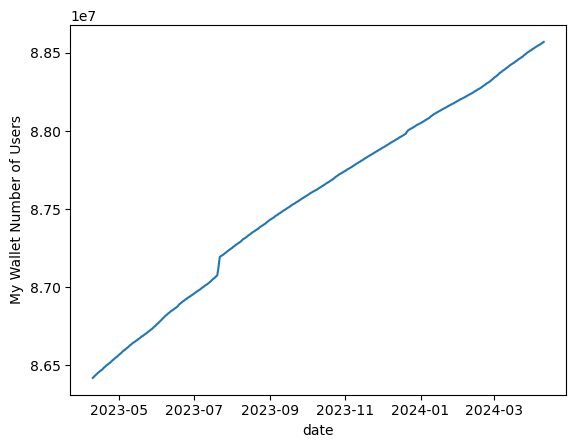

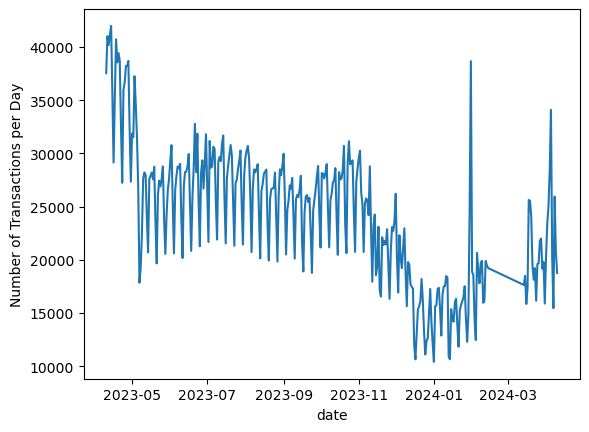

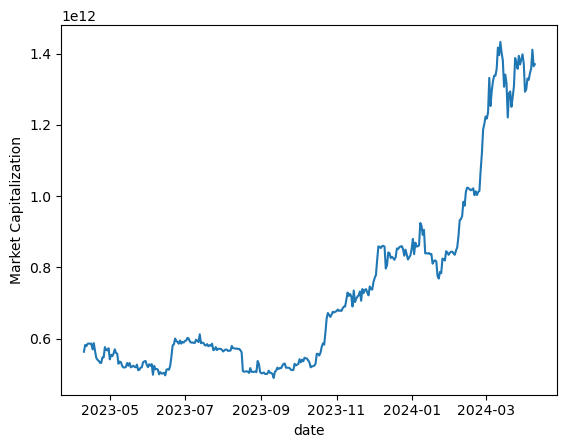

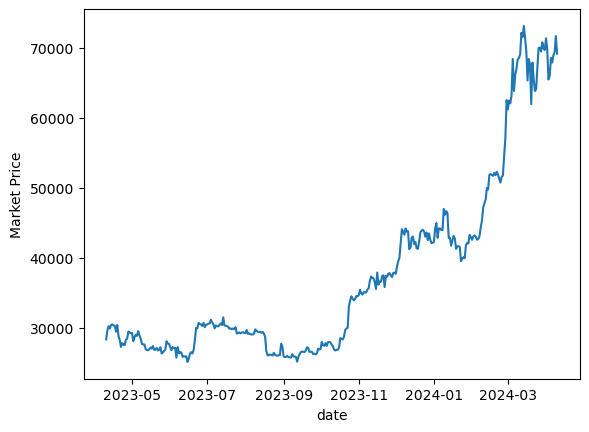

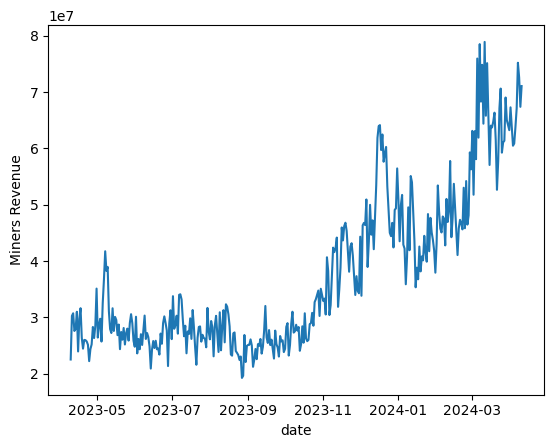

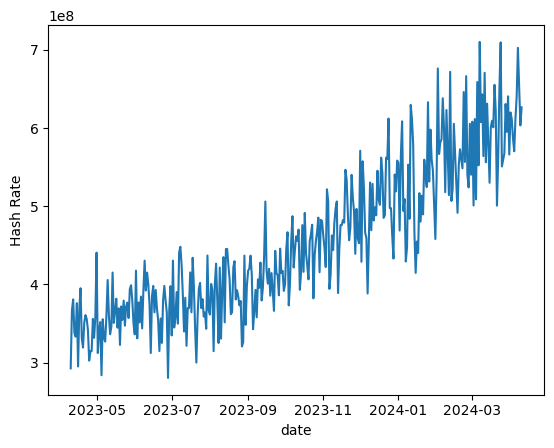

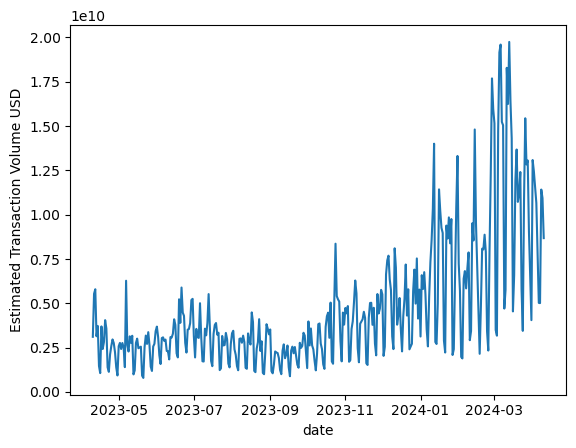

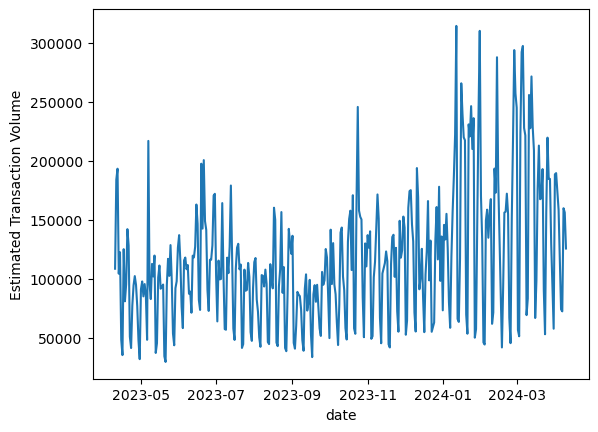

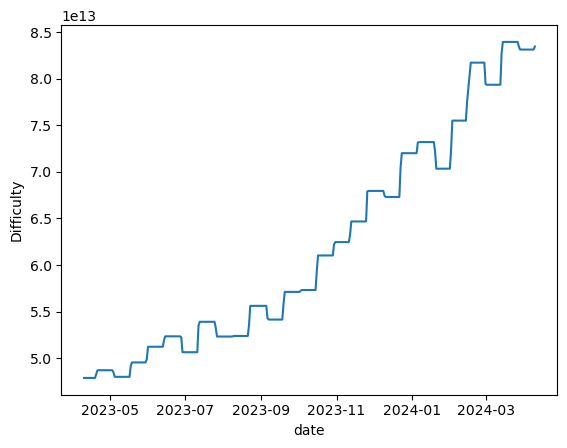

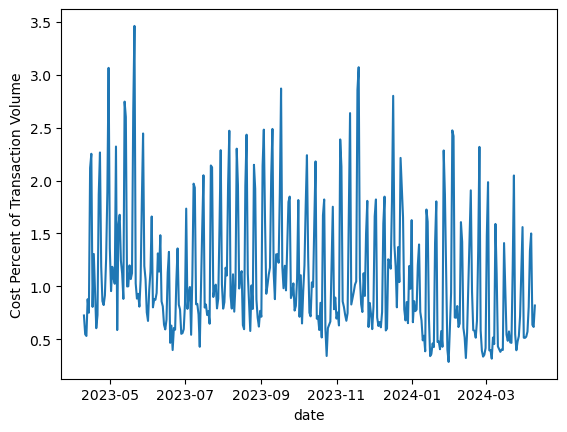

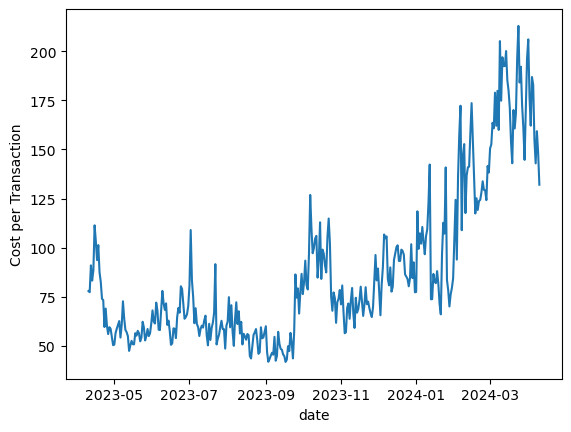

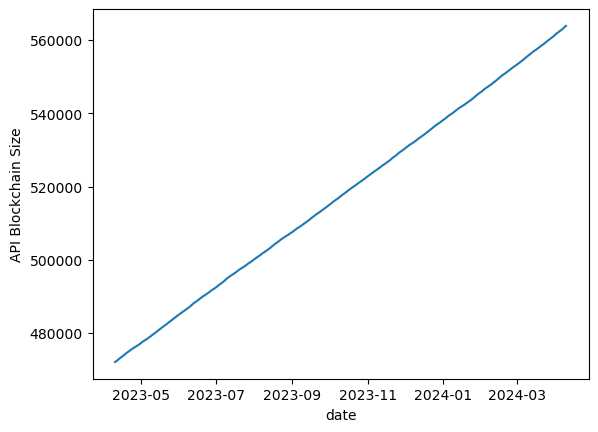

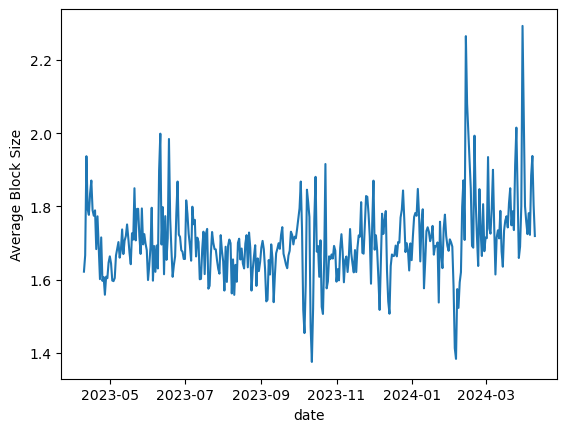

In [35]:
for col in bitcoin_df.columns:
    plt.subplots()
    sns.lineplot(bitcoin_df.loc['2023-04-10':'2024-04-10'][col])

plt.close()

<Axes: >

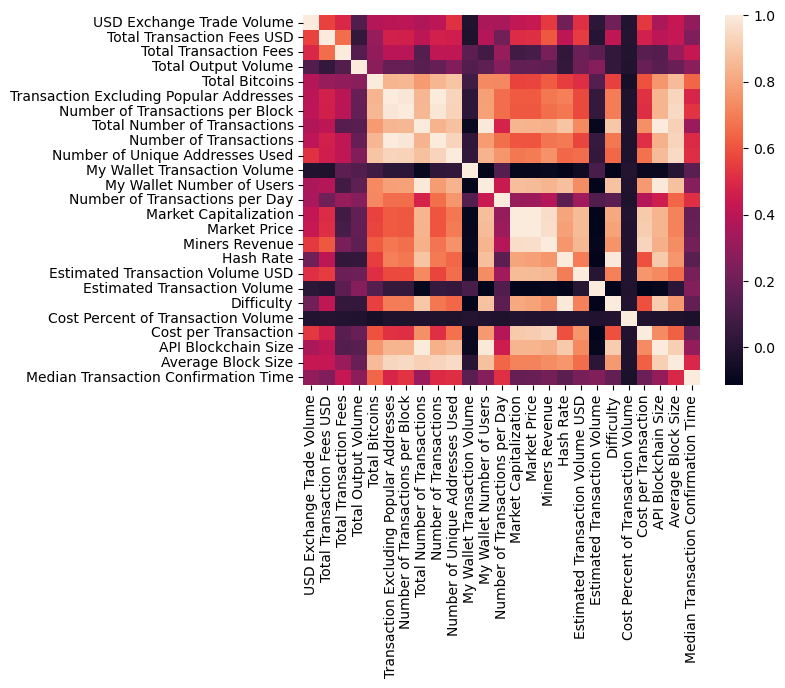

In [36]:
sns.heatmap(bitcoin_df.corr())

Since the ultimate goal is to create a Price predictor let's look at matters that are highly possitively correlated with _Market Price_ and highly negatively correlated. Our Master list being: _Total Transaction Fees, Total Bitcoins, Total Number of Transactions, My Wallet Number of Users, Market Capitalization, Miners Revenue, Estimated Transaction Volume USD, Estimated Transaction Volume, Difficulty, Cost Percent of Transaction Volume, Cost per Transaction, API Blockchain Size_, and _Median Transaction Confirmation Time._

In [37]:
corr_list = ['Total Transaction Fees', 'Total Bitcoins', 'Total Number of Transactions',
             'My Wallet Number of Users', 'Market Capitalization', 'Miners Revenue',
             'Estimated Transaction Volume USD', 'Estimated Transaction Volume', 'Difficulty',
             'Cost Percent of Transaction Volume', 'Cost per Transaction', 'API Blockchain Size',
             'Median Transaction Confirmation Time']

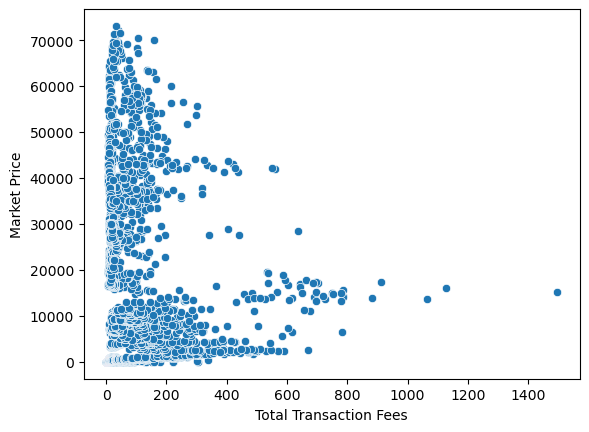

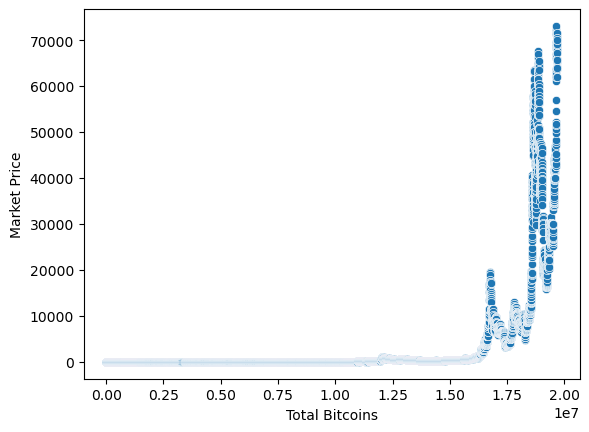

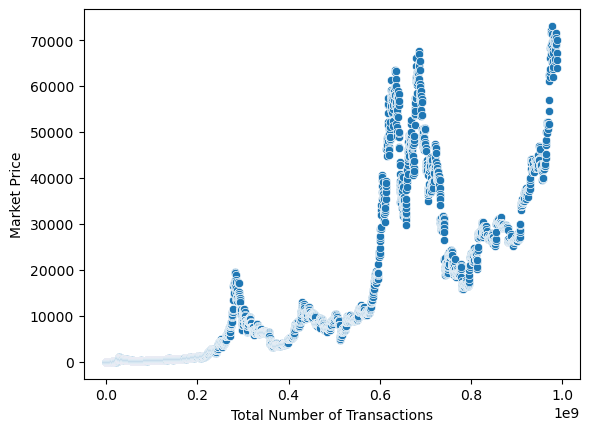

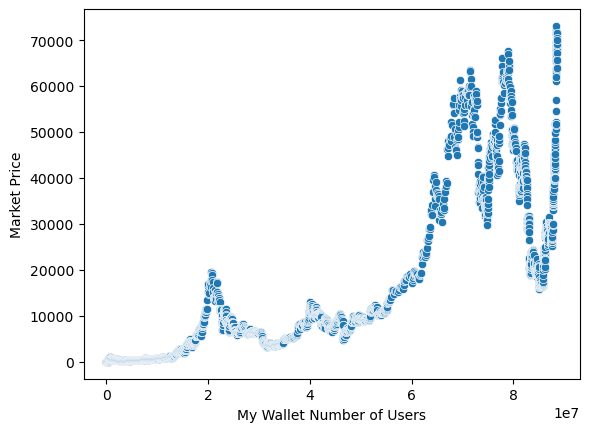

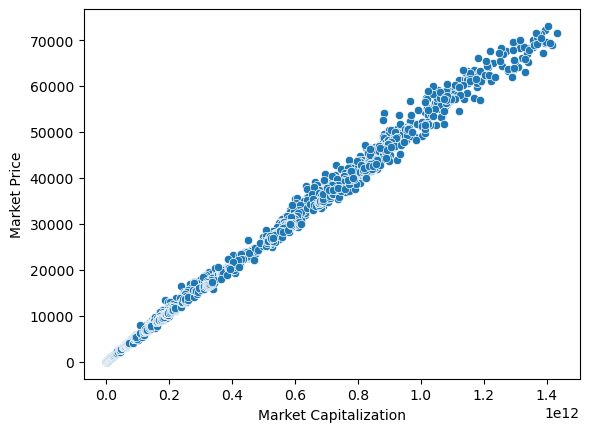

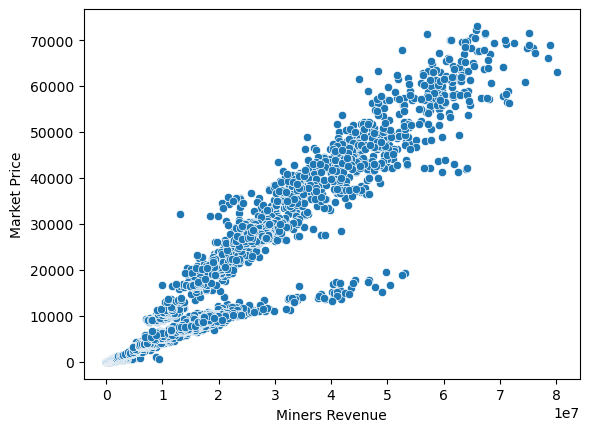

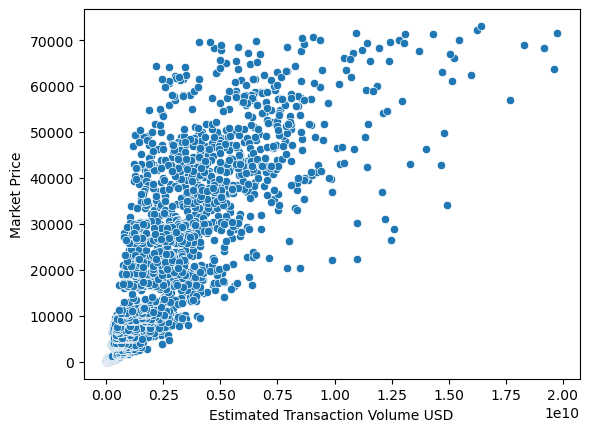

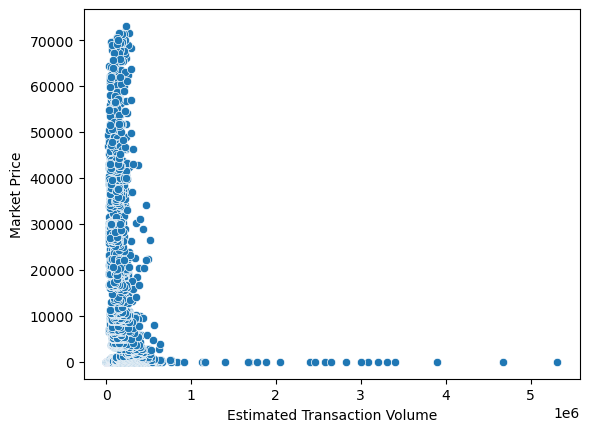

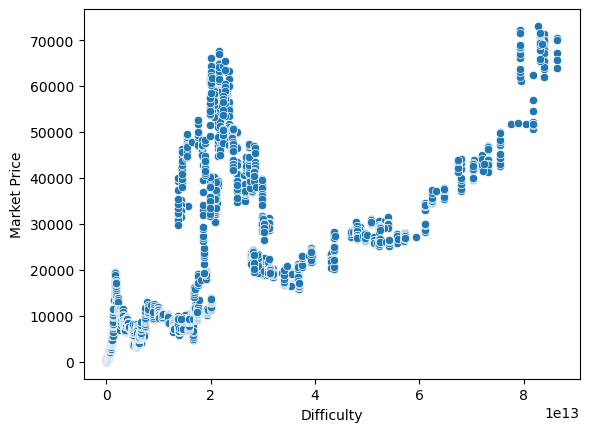

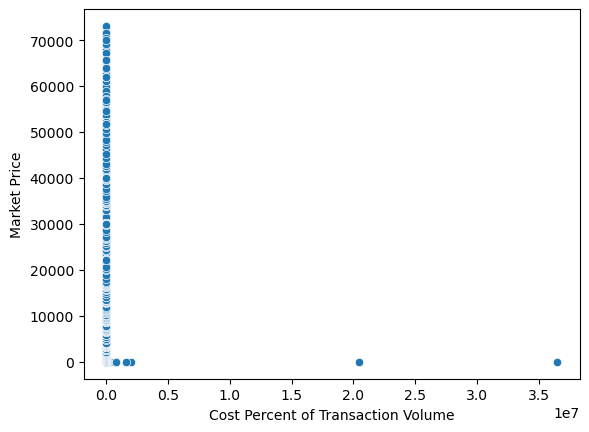

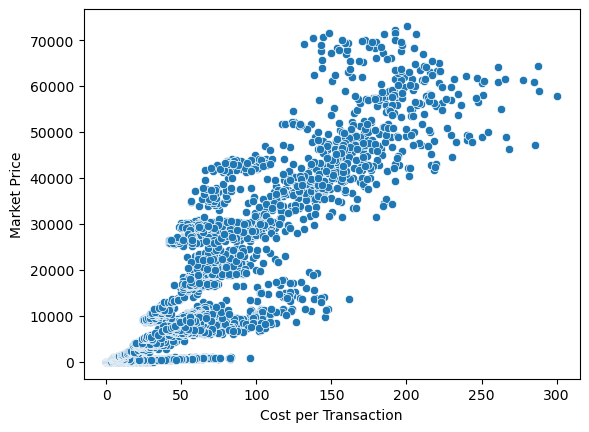

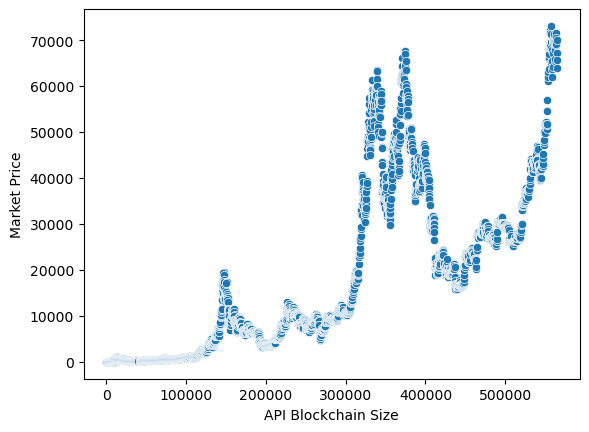

In [38]:
for col in corr_list:
    plt.subplots()
    sns.scatterplot(x=bitcoin_df[col], y=bitcoin_df['Market Price'])

plt.close()

We have some interesting data sets here.  It shows that _Market Capitaliztion_ and Market Price_ are so tightly correlated they may as well be a straight line at this point.  What this would mean, should we endeavor to use say a random forest classifier on these data, it would likely use _Market Capitalization_ as a fall back for prediction, which is useless. We'd have to work on creating a _Market Capitalization_ predictor to understand that factor. Therefore at a certain point I believe we will be dropping that column. 

Other interseting tidbit is that the the _API Blockchain Size_ is operating in parallel with _My Wallet Number of Users._

<Axes: xlabel='API Blockchain Size', ylabel='My Wallet Number of Users'>

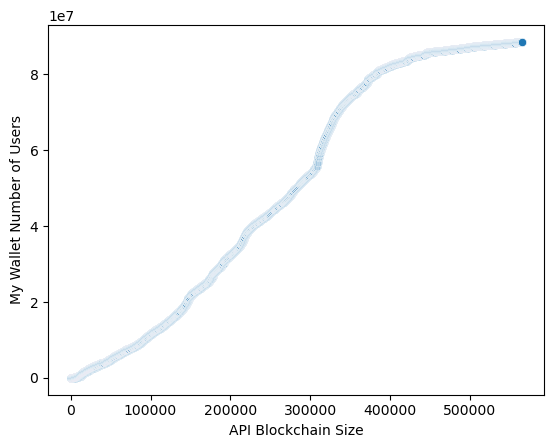

In [39]:
sns.scatterplot(x=bitcoin_df['API Blockchain Size'], y=bitcoin_df['My Wallet Number of Users'])

Correct that Perfectly in Sync!

What is of greatest concern however from these data is the creation of pseudo time series, meaning they appear as time series but as they are not attached date and time in these representations, this is a false interpretation.  But the continuous rise and fall of data points in quasi-linear fashion suggests that thought these data are correlated both negatively and positively, there are other uncorrelated factors which affect our correlated ones.  In a word: confounding variables.  This creates a multi-layered approach to accurately predicting the market price the more feasible pursuit.  Thus we shall endeavor to review the correlations that affect our correlated values, and if necessary, their correlated values.  Hopefully by doing this we can establish the base predictors for market price vicariously through these vector layers.

In [40]:
layer1_corr_totalbitcoins = ['Total Output Volume', 'Transaction Excluding Popular Addresses', 'Number of Transactions per Block',
                     'Number of Transactions', 'Number of Unique Addresses Used', 'Cost Percent of Transaction Volume',
                     'Estimated Transaction Volume', 'Average Block Size', 'My Wallet Transaction Volume']

layer1_corr_numoftrans = ['Total Transaction Fees', 'Total Output Volume', #'Total Bitcoins',
                     'Transaction Excluding Popular Addresses', 'Number of Transactions per Block', 'Number of Transactions',
                     'Number of Unique Addresses Used', 'My Wallet Transaction Volume', 'Hash Rate',
                     'Estimated Transaction Volume', 'Cost Percent of Transaction Volume', 'Average Block Size']

layer1_corr_walletnumsusers = ['Total Transaction Fees', 'Total Output Volume', #'Total Bitcoins',
                     'Transaction Excluding Popular Addresses', 'Number of Transactions per Block', 'Number of Transactions',
                     'Number of Unique Addresses Used', 'My Wallet Transaction Volume', 'Hash Rate',
                     'Estimated Transaction Volume USD', 'Estimated Transaction Volume', 'Cost Percent of Transaction Volume',
                     'Average Block Size']

layer1_corr_difficulty = ['Total Transaction Fees', 'Total Output Volume', 'My Wallet Transaction Volume',
                          'Hash Rate', 'Estimated Transaction Volume', 'Cost Percent of Transaction Volume']

layer1_corr_APIchainsize = ['Transaction Excluding Popular Addresses', 'Number of Transactions per Block', 'Number of Transactions',
                            'Number of Unique Addresses Used', 'My Wallet Transaction Volume', 'Estimated Transaction Volume',
                            'Cost Percent of Transaction Volume']

In [41]:
layer1_dict = {'Total Bitcoins': layer1_corr_totalbitcoins,
               'Total Number of Transactions': layer1_corr_numoftrans,
               'My Wallet Number of Users': layer1_corr_walletnumsusers,
               'Difficulty': layer1_corr_difficulty,
               'API Blockchain Size': layer1_corr_APIchainsize}

Total Bitcoins
Total Number of Transactions
My Wallet Number of Users
Difficulty
API Blockchain Size


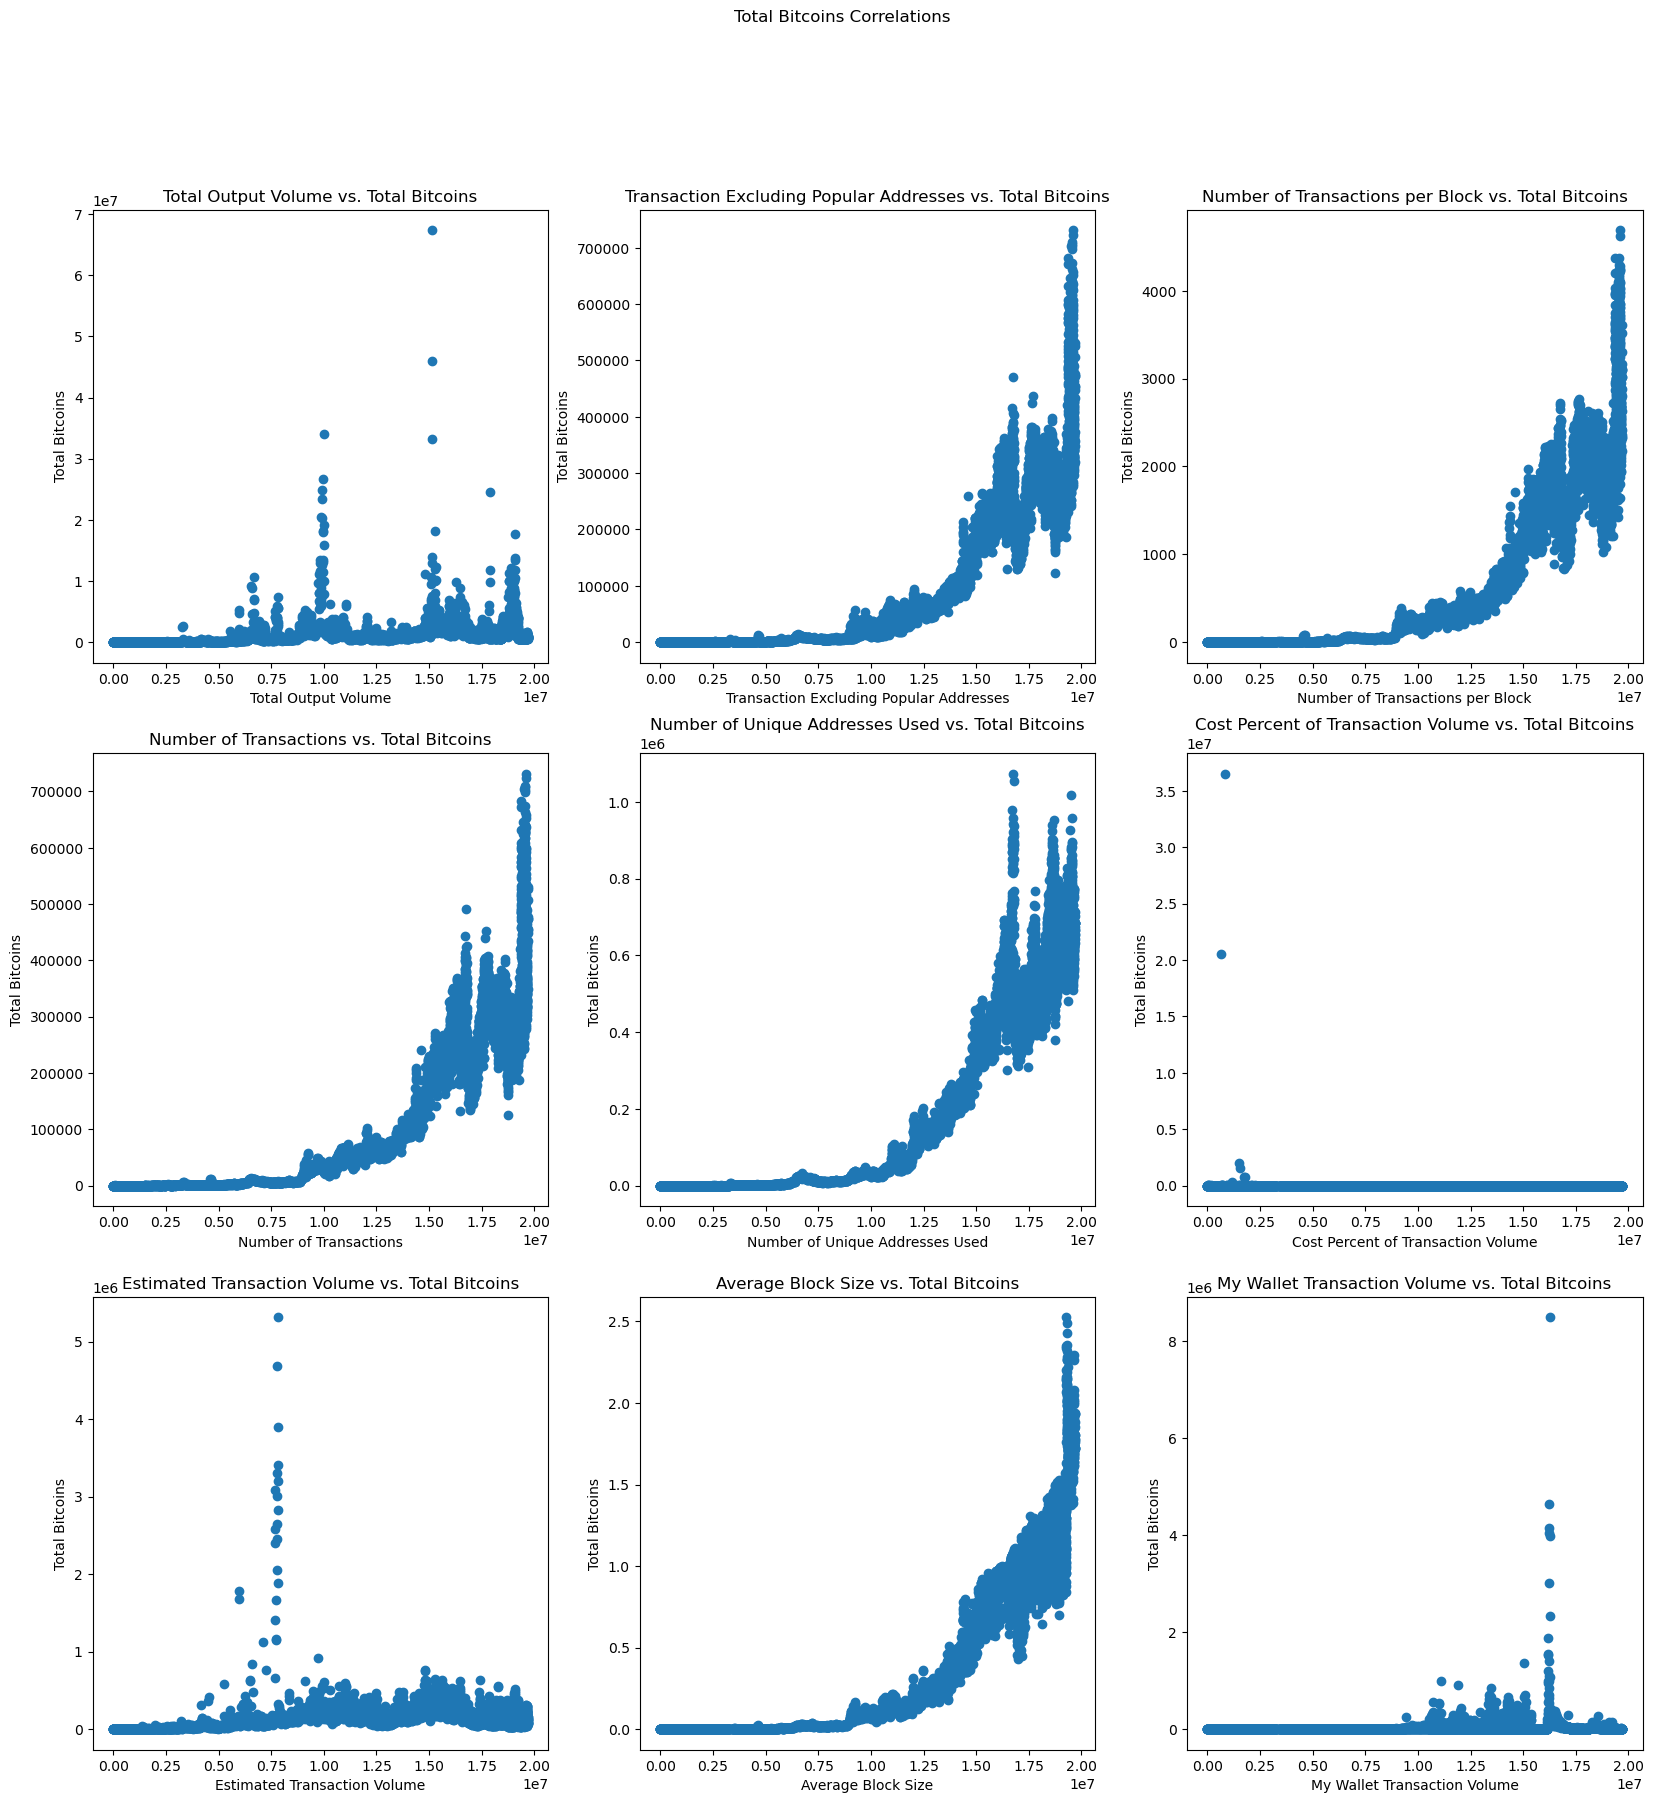

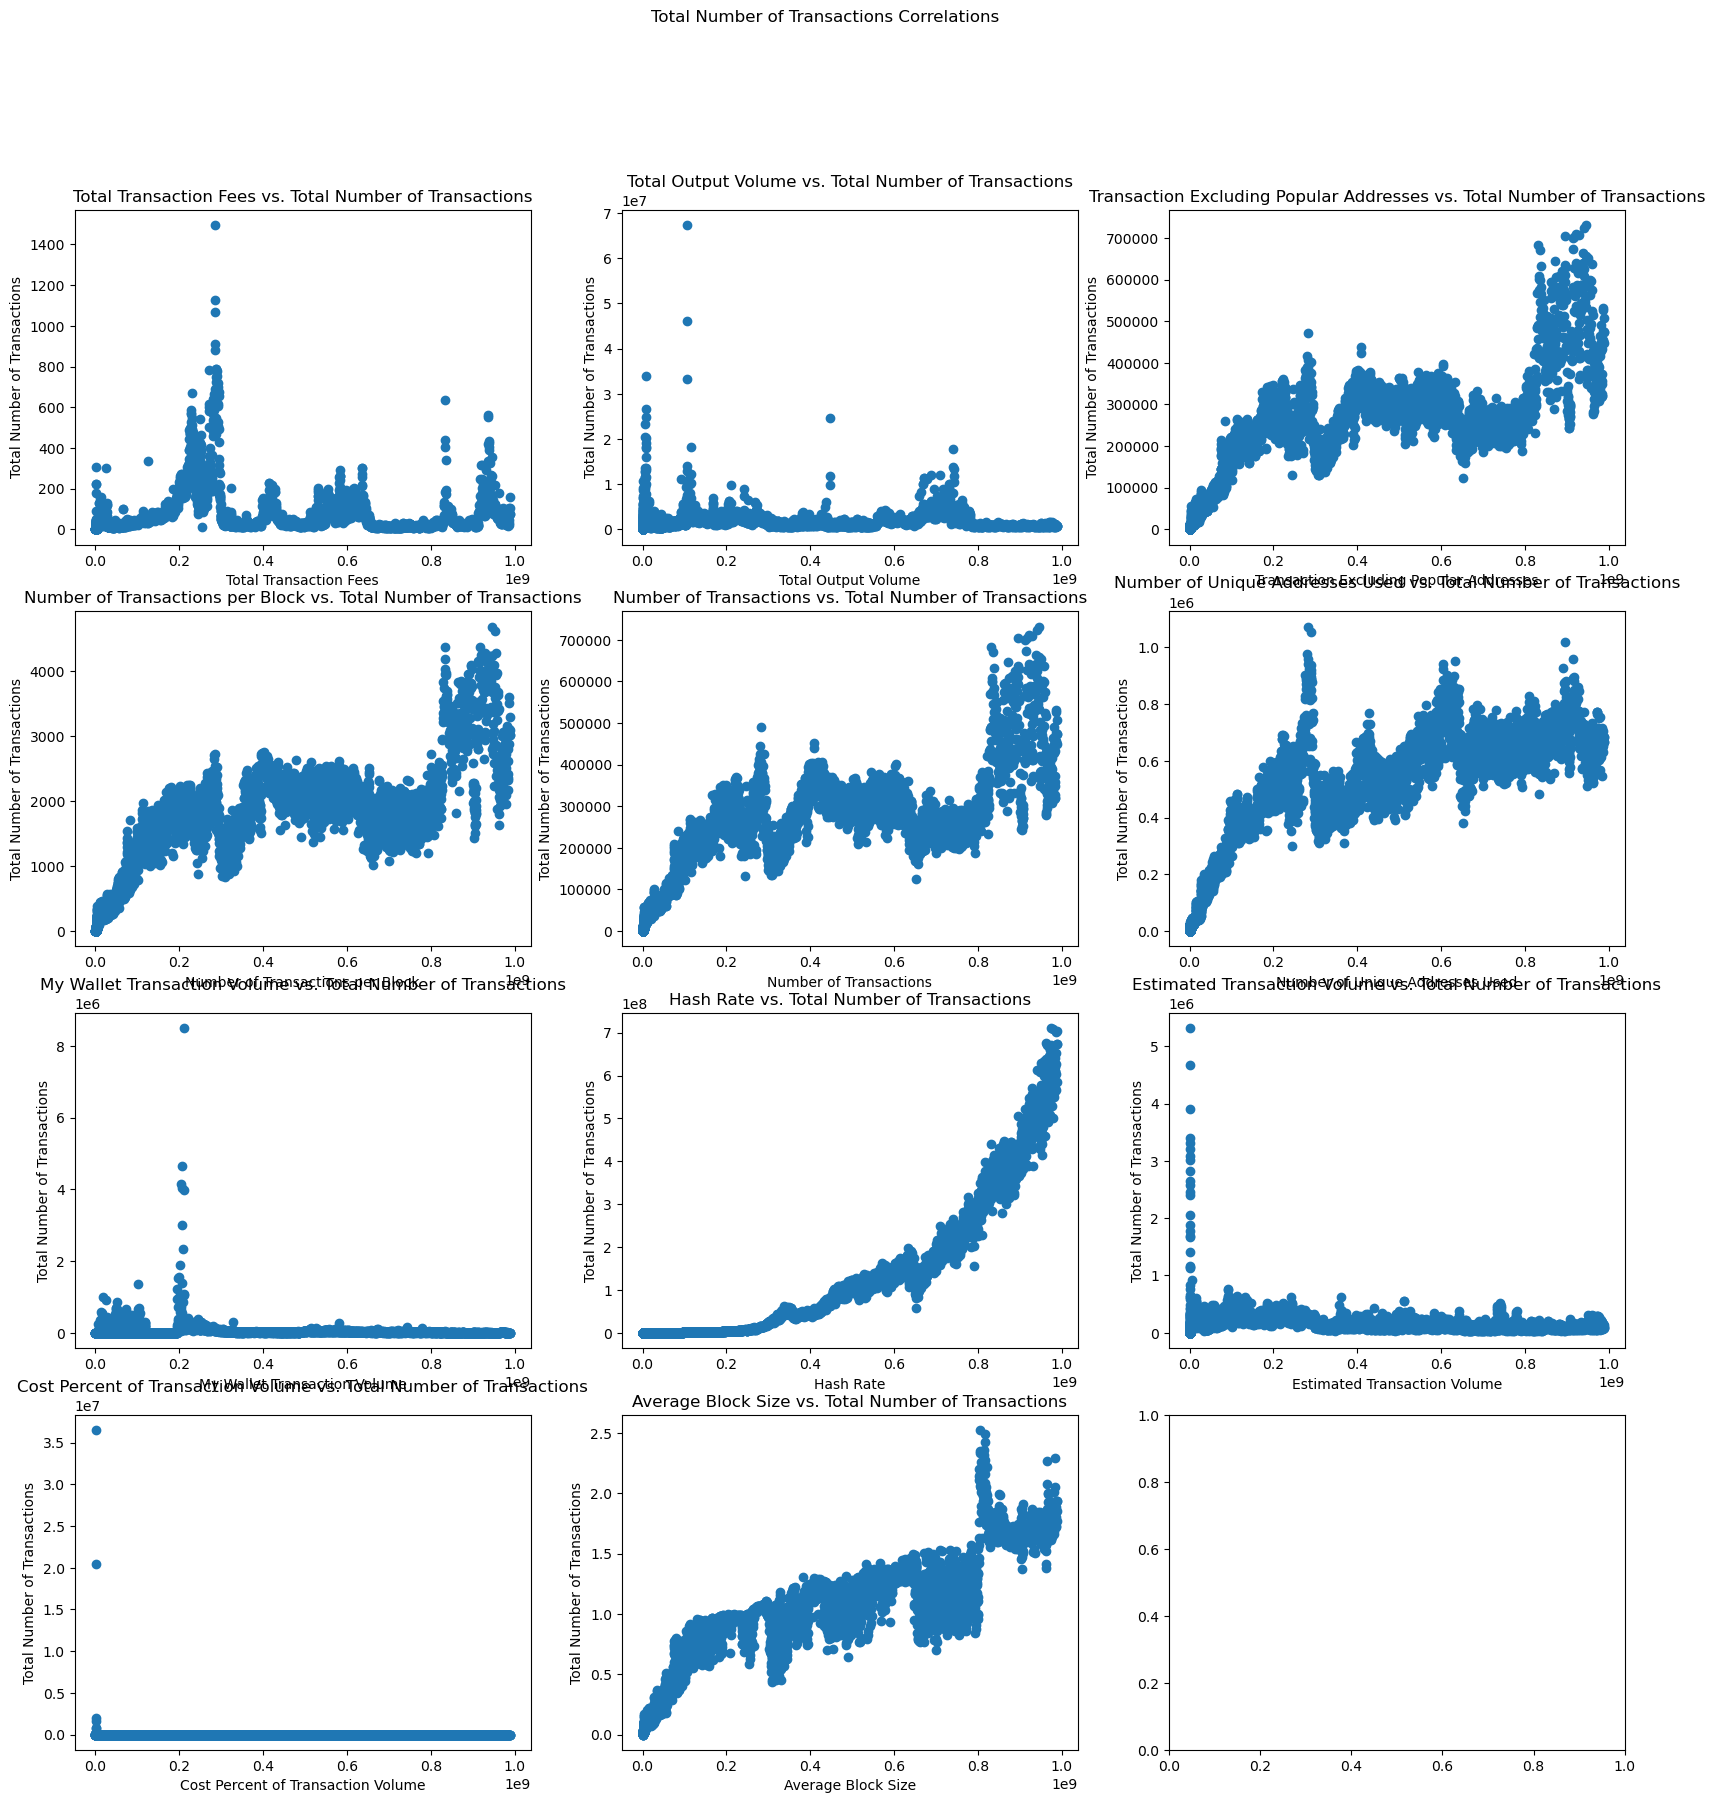

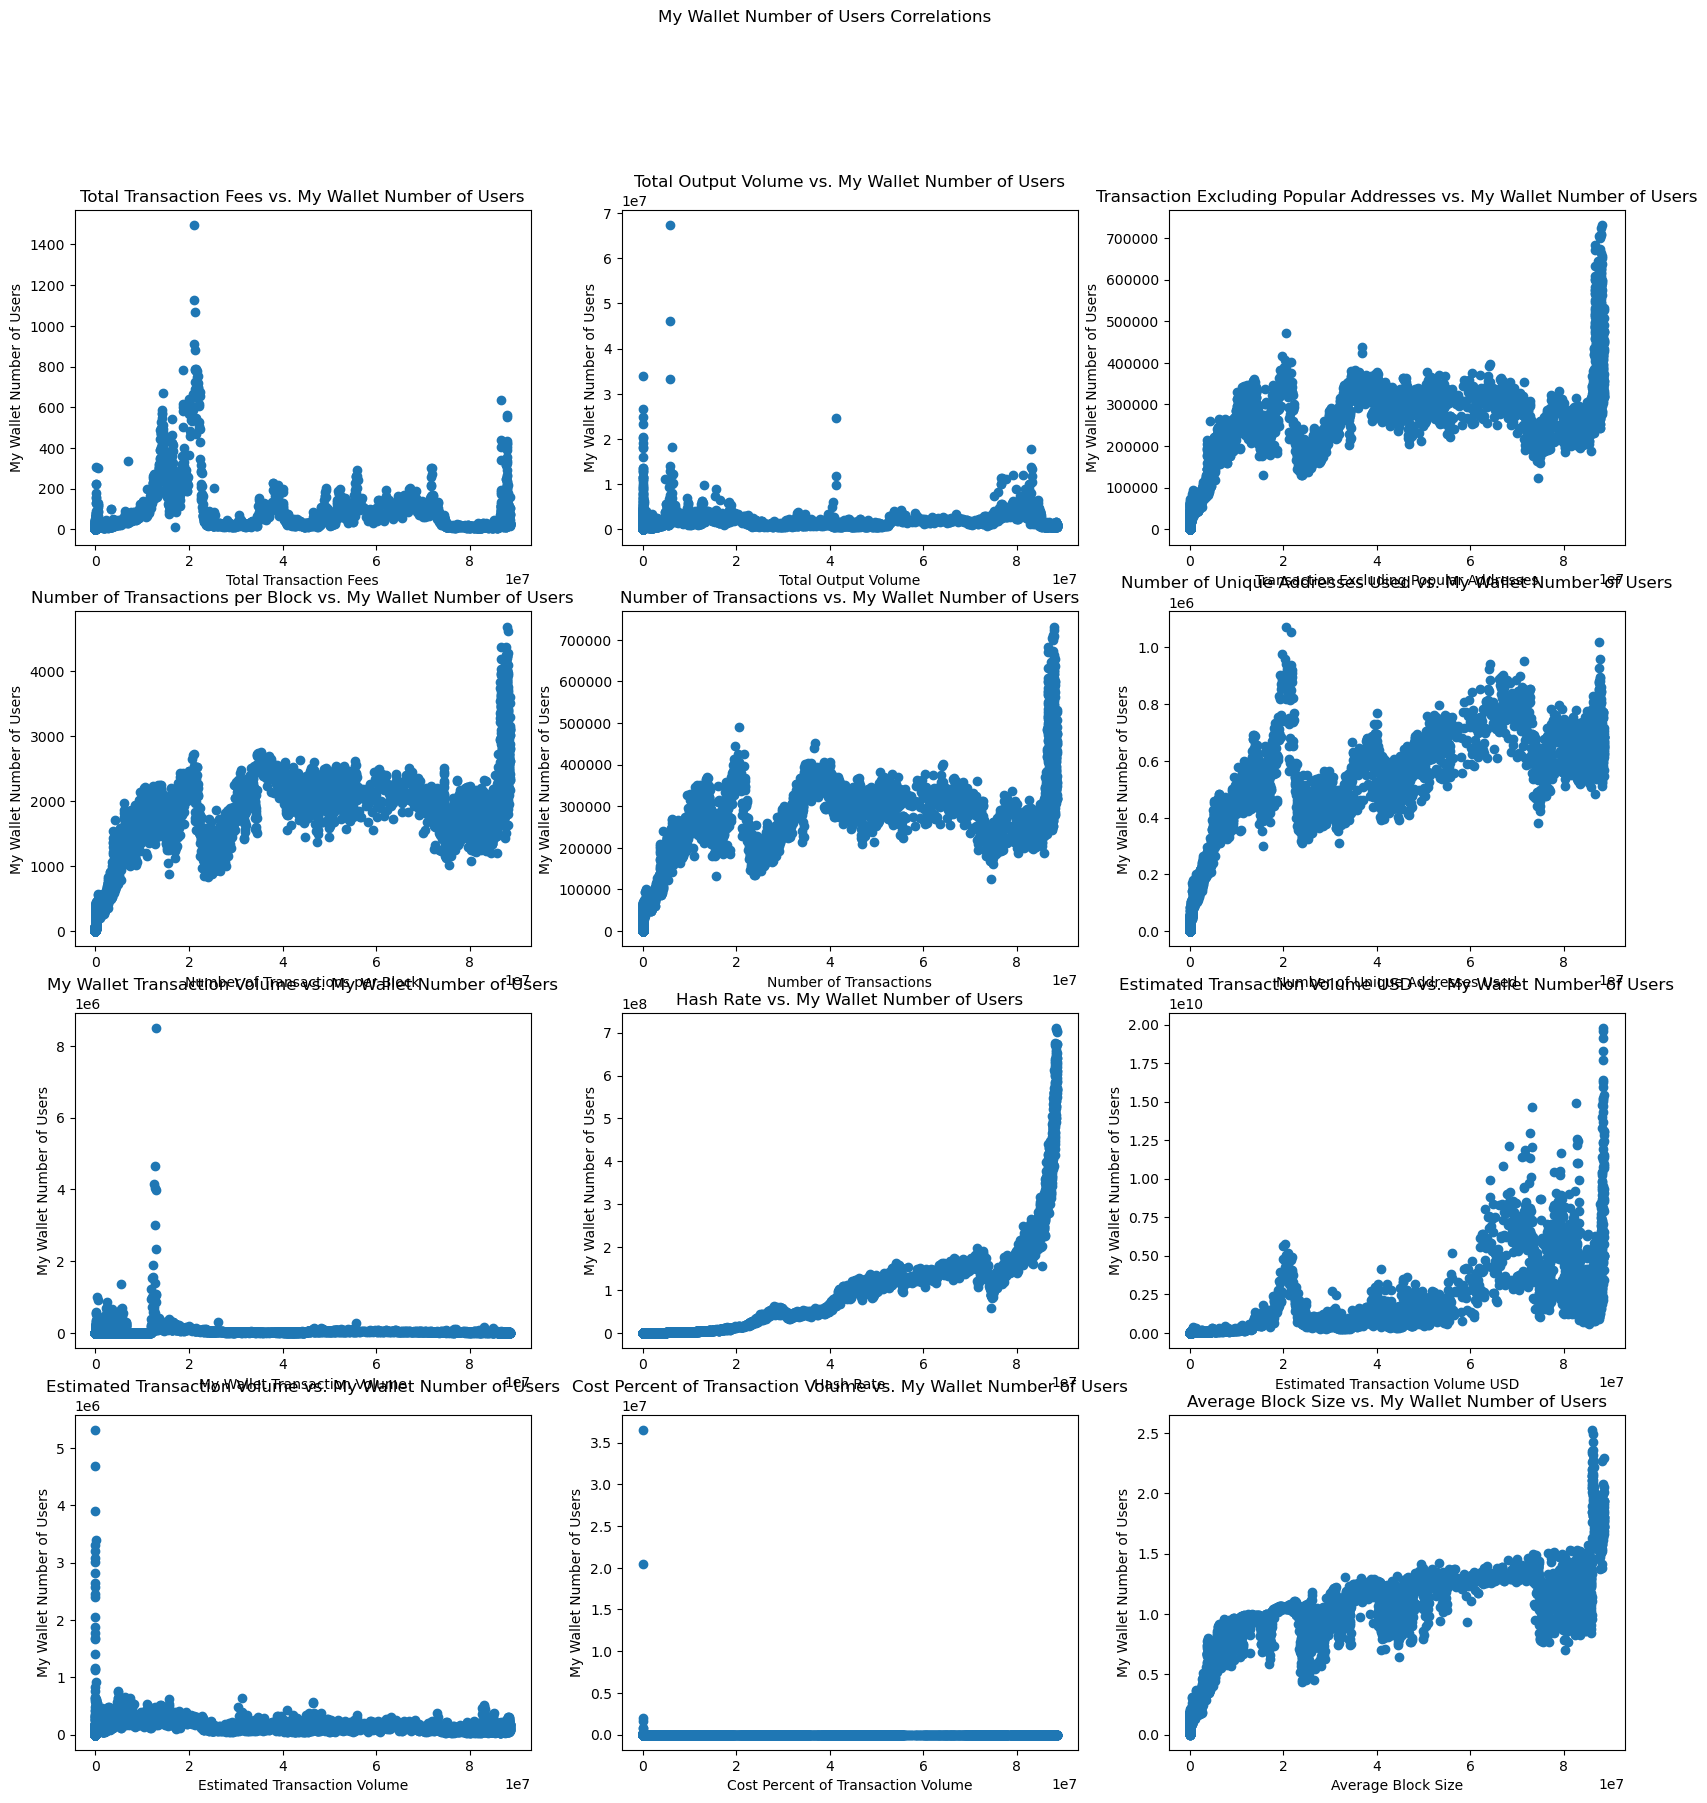

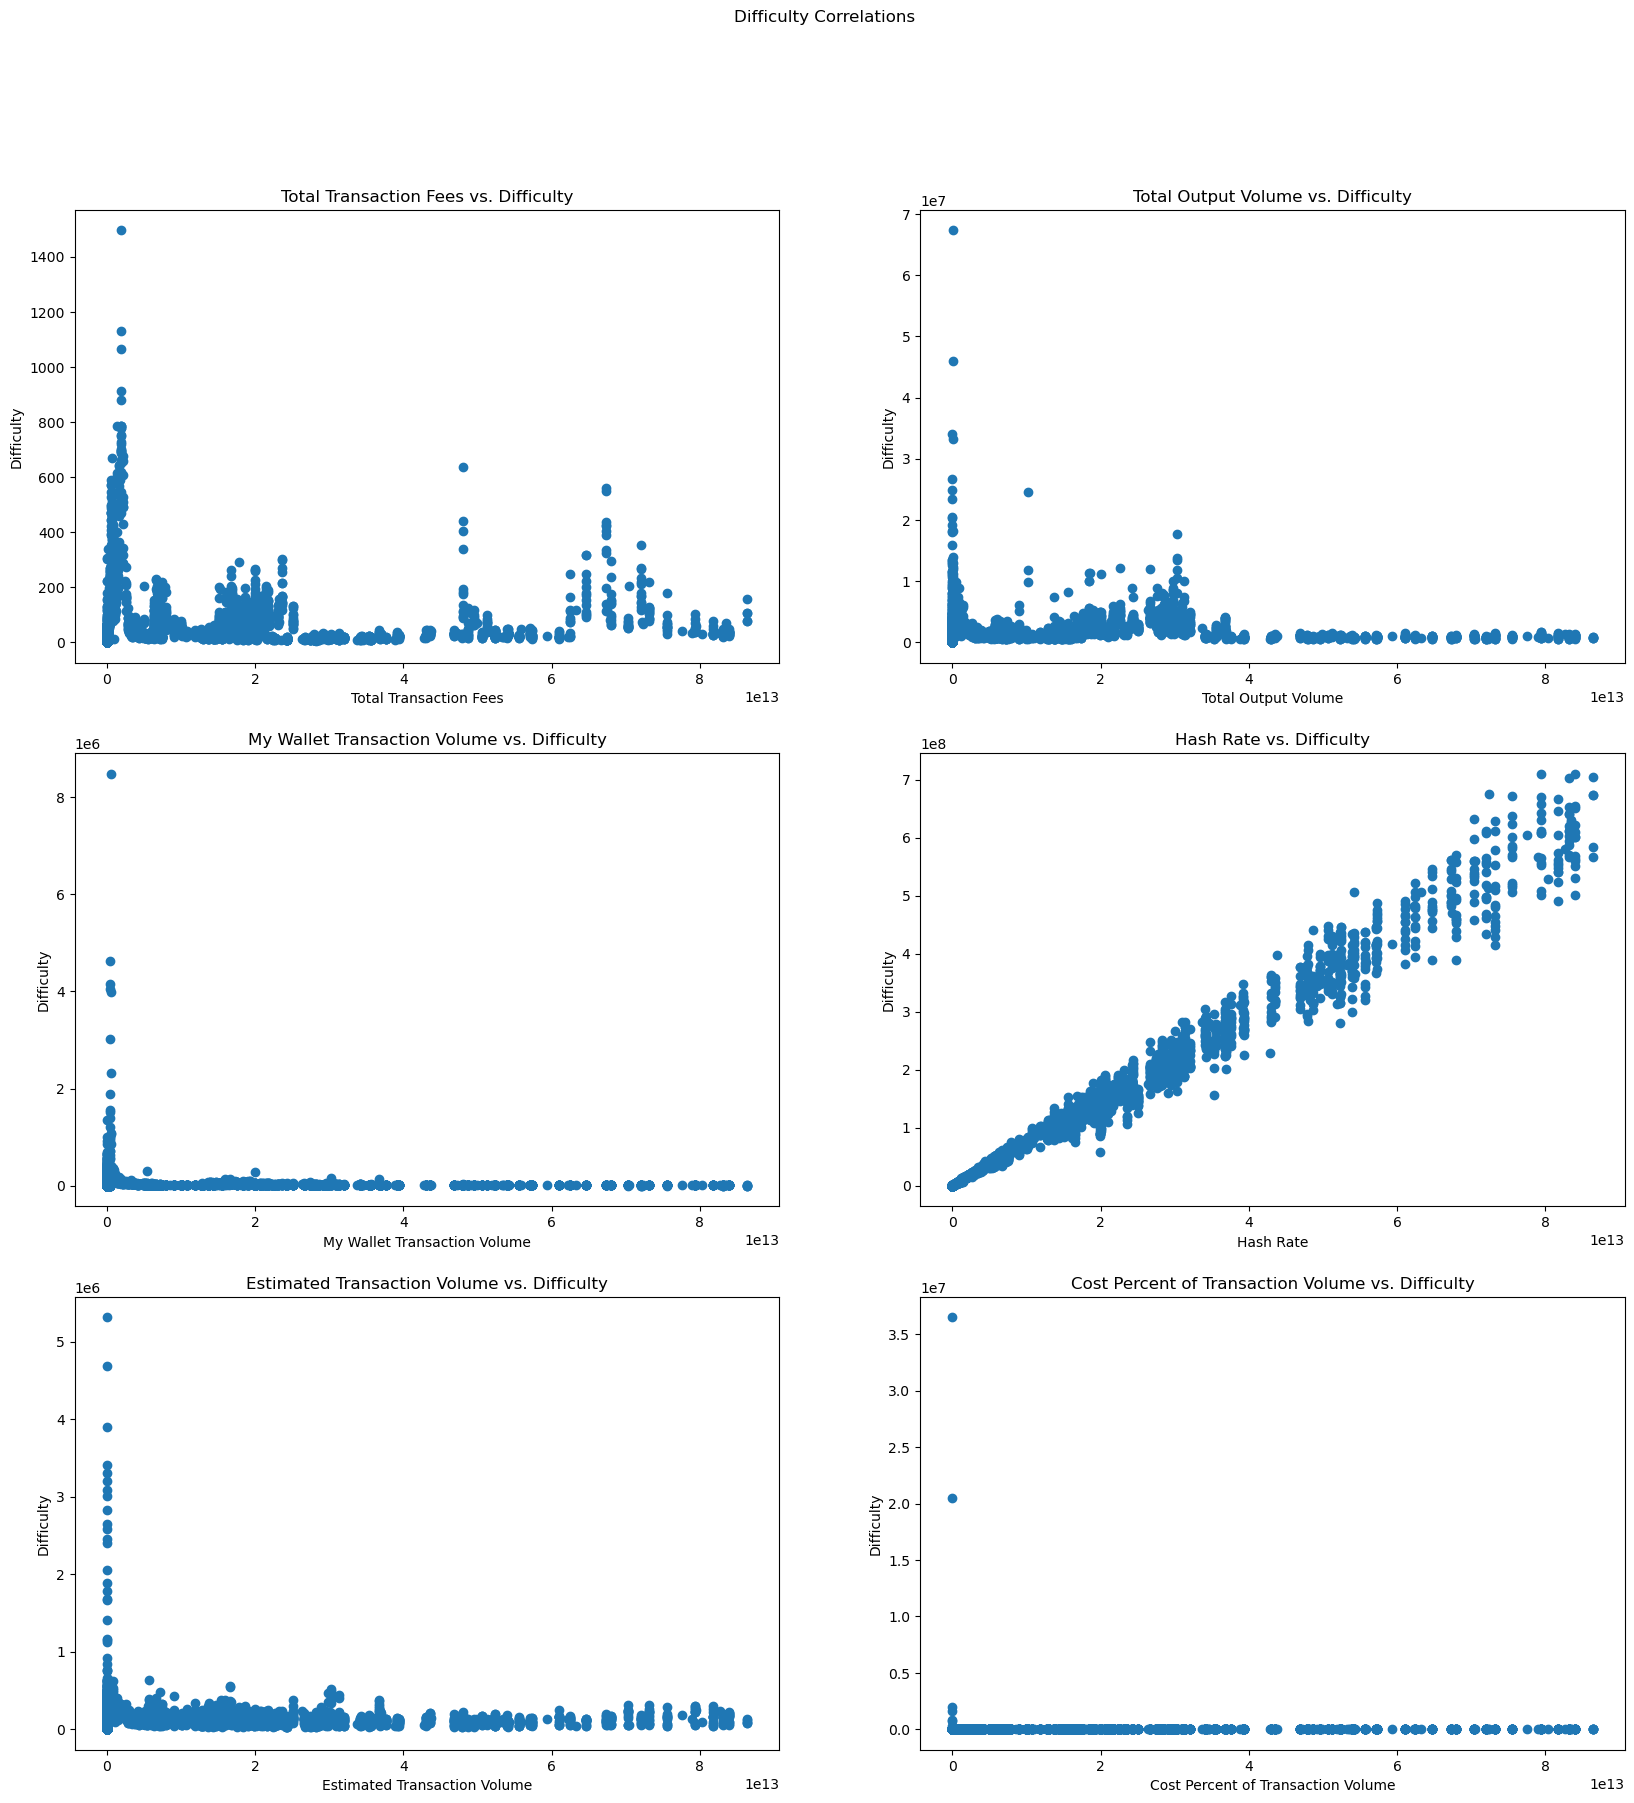

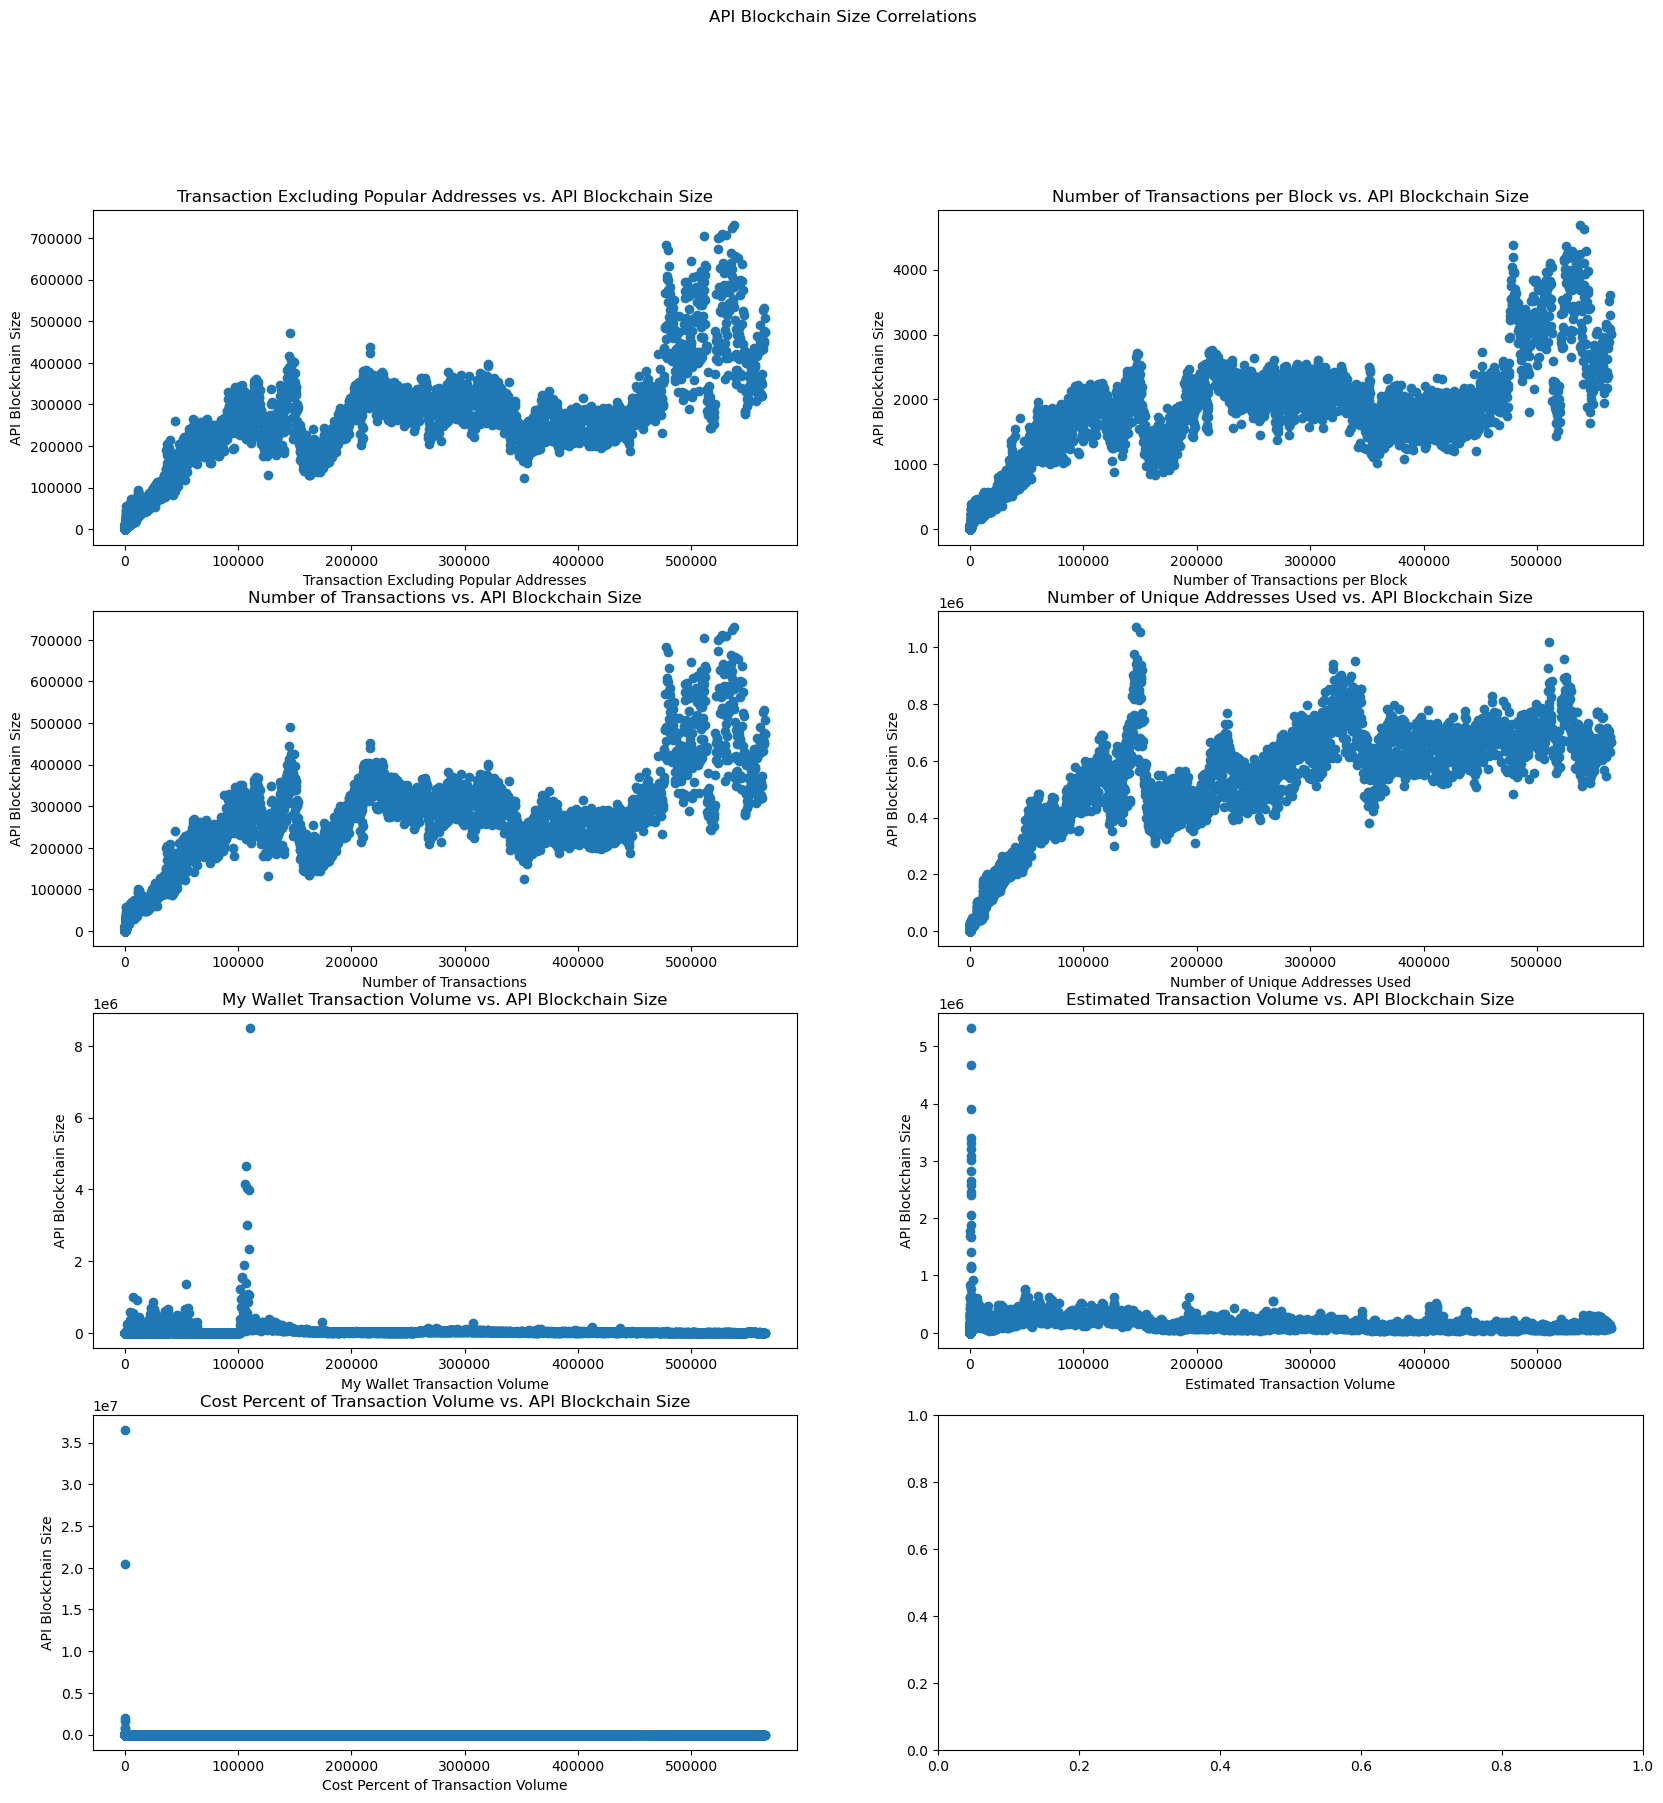

In [42]:
for key, item in layer1_dict.items():
    # Factor rows and columns per set
    row = int(np.sqrt(len(item)))
    if row ** 2 != len(item) and row ** 2 < len(item) and len(item) - row ** 2 <= row:
        col = row
        row += 1
    elif row ** 2 != len(item) and row ** 2 < len(item) and len(item) - row ** 2 > row:
        col = row
        row += 2
    else:
        col = row
    # Plot correlations
    fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(20,20))
    k = 0
    while k < len(item):
        for i in range(row):
            for j in range(col):
                # print(f'##########--==KEYS: {key}==--##########')
                # print(f'Cols: {j+1}/{col}   Rows: {i+1}/{row}   Items: {k+1}/{len(item)}')
                # print('\n')
                axs[i][j].scatter(x=bitcoin_df[key], y=bitcoin_df[item[k]])
                axs[i][j].set_xlabel(item[k])
                axs[i][j].set_ylabel(key)
                axs[i][j].set_title(f'{item[k]} vs. {key}')
                k += 1
                if k == len(item):
                    break
    print(key)
    plt.suptitle(f'{key} Correlations')

In [43]:
plt.close()

So that got some interesting graphs. The good news is that the noise pattern is clearer and more commonly manifests itself as outlyers from this collection of graphs from the first correlation layer after _Market Price_ correlations.  I hope this means that we can more or less treat them as such and they aren't indicative of the need for a 2nd layer.

That said there are a number of clear relationships between different columns clearly being made here which makes this dataset a nifty candidate for performing PCA analysis, thus we should be able to reasonbly reduce the number of factors used for multi-variate time series prediction without losing too much of the residual data.

Now let's show the time series of how these PCA components relate to eachother.

In [44]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(bitcoin_df)
pca_variance_ratios = []
for i in range(12):
    pca = PCA(n_components=(i+1))
    pca.fit(data_scaled)
    pca_data = pca.transform(data_scaled)

    pca_variance_ratios.append(pca.explained_variance_ratio_)

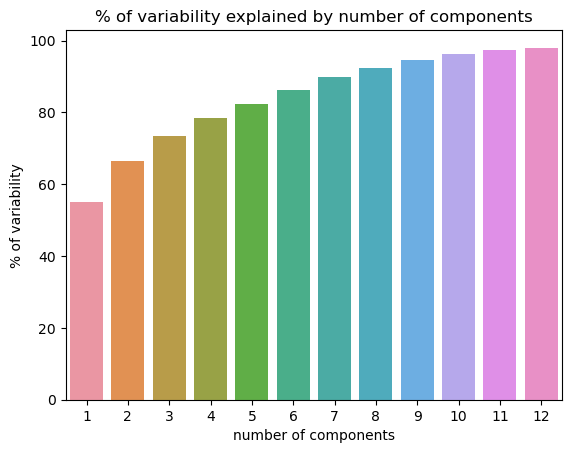

In [45]:
num_of_PCA_components = []
explained_variability  = []
for i in range(len(pca_variance_ratios)):
    num_of_PCA_components.append(i+1)
    explained_variability.append(round(sum(pca_variance_ratios[i] * 100), 2))
 
sns.barplot(x=num_of_PCA_components, y=explained_variability)
plt.title(r'% of variability explained by number of components')
plt.ylabel(r'% of variability')
plt.xlabel('number of components')
plt.show()
plt.close()        

In [46]:
print(abs(pca.components_))

[[1.37915151e-01 1.50067104e-01 8.44568629e-02 5.76724492e-02
  2.23474417e-01 2.42474791e-01 2.41879501e-01 2.57893888e-01
  2.41142140e-01 2.51440005e-01 9.32174419e-03 2.51733534e-01
  1.55079168e-01 2.34120178e-01 2.34670140e-01 2.42251108e-01
  2.23092813e-01 2.16308804e-01 5.33248982e-03 2.24208023e-01
  6.75498192e-03 2.14122417e-01 2.56655033e-01 2.54107286e-01
  1.16665009e-01]
 [1.18459352e-01 4.86032004e-02 3.46764130e-01 1.80560068e-01
  2.12709339e-01 1.58787161e-01 1.67180705e-01 8.94667287e-02
  1.70793588e-01 1.59243141e-01 2.14008737e-01 1.34103245e-01
  3.33317998e-01 2.24327469e-01 2.17002653e-01 1.51855139e-01
  2.25333777e-01 1.37932770e-01 2.62261766e-01 2.22740684e-01
  2.11721247e-02 1.57001458e-01 1.02096955e-01 9.23307867e-02
  3.77117400e-01]
 [4.65107970e-01 4.84273724e-01 4.03092151e-01 2.23634448e-02
  1.63943425e-01 1.44077884e-01 1.48054162e-01 1.38739053e-01
  1.40477301e-01 5.98221493e-02 1.01959644e-02 1.22443537e-01
  1.00467742e-01 1.24924595e-01 1.

In [47]:
model = PCA(n_components=12).fit(bitcoin_df.drop(columns='Market Price'))
X_pc = model.transform(bitcoin_df.drop(columns='Market Price'))

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

initial_feature_names = bitcoin_df.drop(columns='Market Price').columns
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
most_import_features_df = pd.DataFrame(dic.items()).rename(columns={0: 'PC', 1: 'Feature Name'})

In [48]:
most_import_features_df

PC                        Feature Name
0    PC1                          Difficulty
1    PC2               Market Capitalization
2    PC3    Estimated Transaction Volume USD
3    PC4           USD Exchange Trade Volume
4    PC5        Total Number of Transactions
5    PC6                           Hash Rate
6    PC7           My Wallet Number of Users
7    PC8                      Miners Revenue
8    PC9           My Wallet Number of Users
9   PC10                 Total Output Volume
10  PC11          Total Transaction Fees USD
11  PC12  Cost Percent of Transaction Volume

In [59]:
nums = [i for i in range(25)]
rename_dict = dict(zip(nums, bitcoin_df.columns))
data_scaled_df = pd.DataFrame(data_scaled).rename(columns=rename_dict)

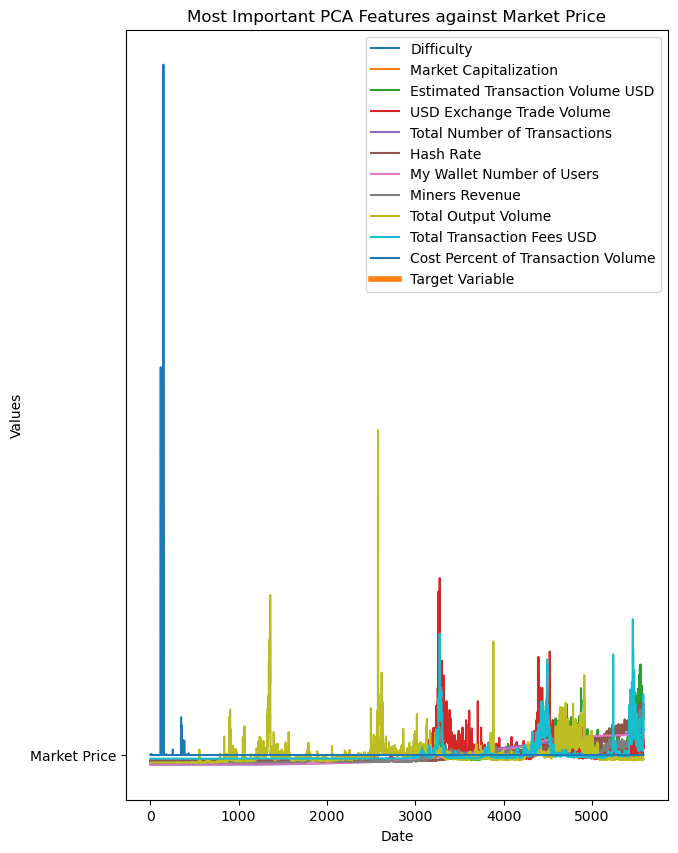

In [61]:
most_important_features_list = ['Difficulty', 'Market Capitalization', 'Estimated Transaction Volume USD', 'USD Exchange Trade Volume', 'Total Number of Transactions', 'Hash Rate',
                                'My Wallet Number of Users', 'Miners Revenue', 'Total Output Volume', 'Total Transaction Fees USD', 'Cost Percent of Transaction Volume']

for feature in most_important_features_list:
    plt.plot(data_scaled_df[feature], label=feature)
plt.plot('Market Price', label='Target Variable', lw=4)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title("Most Important PCA Features against Market Price")
plt.show()

In [50]:
def add_pca(df, pca_data):
    for i in range(len(pca_data[0])):
        print(f"PCA {i+1}/{len(pca_data[0])}")
        pca_temp = []
        for row in pca_data:
            pca_temp.append(row[i])
        df[f'PCA{i+1}'] = pca_temp

In [51]:
add_pca(bitcoin_df, pca_data)

PCA 1/12
PCA 2/12
PCA 3/12
PCA 4/12
PCA 5/12
PCA 6/12
PCA 7/12
PCA 8/12
PCA 9/12
PCA 10/12
PCA 11/12
PCA 12/12


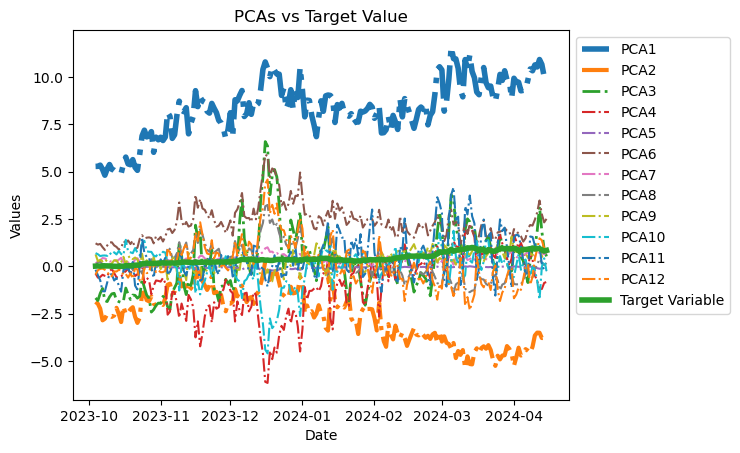

In [52]:
pca_list = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12']
for pca in pca_list:
    if pca == 'PCA1':
        plt.plot(bitcoin_df.loc['2023-10-04':'2024-10-04'][pca], label=pca, linestyle= '-.', lw=4)
    elif pca == 'PCA2':
        plt.plot(bitcoin_df.loc['2023-10-04':'2024-10-04'][pca], label=pca, linestyle= '-.', lw=3)
    elif pca == 'PCA3':
        plt.plot(bitcoin_df.loc['2023-10-04':'2024-10-04'][pca], label=pca, linestyle= '-.', lw=2)
    else:
        plt.plot(bitcoin_df.loc['2023-10-04':'2024-10-04'][pca], label=pca, linestyle= '-.')
plt.plot(((bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'] - bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].min()) / (bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].max() - bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].min())),
         label='Target Variable',
         lw=4,)
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('PCAs vs Target Value')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.rcParams['figure.figsize'] = (7,10)
plt.show()

# ((bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'] - bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].min()) / (bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].max() - bitcoin_df.loc['2023-10-04':'2024-10-04']['Market Price'].min()))

In [63]:
# Linux
# bitcoin_df.to_csv('./Data/bitcoin_df_cleaned')
# most_important_features_df.to_csv('./Data/most_important_features')

# Windows
bitcoin_df.to_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\bitcoin_df_cleaned')
most_import_features_df.to_csv(r'C:\Users\micha\OneDrive\Documents\GitHub\SpringBoardDataScience\Capstone_Project_3\Data\most_important_features')

With that we've completed our Exploratory Data Analysis.  This also included a modicum of feature engineering. However we will explore that more fully in the next jupyter notebook where we will go full dive into Feature Engineering, Pre-Processing, and Modeling.  The good news about the PCA analysis we conducted here at the end is we abstracted away from the _Market Capitalization_ feature which hopefully will allow us to still use it vicariously via the PCA Features we created.